<center>
<center>

# <font size="6">Computational Linear Algebra for Large Scale Problems </font>
#<font size="6">A.Y. 23/24</font>
</center>


**0.** Preparation(Setting the Random State)



---



We include all the libraries and initialize the random state variable.

In [300]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
pd.options.display.max_columns = 200
rs=min(328790,331409)
np.random.seed(rs)

**1.** Loading and Preparing the Data

First we store the DataFrame from the csv file into _df_tot_, then we modify the df as requested.

In [301]:
#1.1 Store in the variable df tot the df obtained from the csv file
path='cla4lsp customers.csv'
df_tot=pd.read_csv(path, sep='\t')
df_tot['Dt_Customer'] = pd.to_datetime(df_tot['Dt_Customer'], format='%d-%m-%Y')
display(df_tot)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [302]:
#1.2 Create a sub-DFs workdf, extracted from df tot, such that it contains 2/3 of the original dataframe’s rows (randomly sampled);
sample_size = int(2/3 * len(df_tot))
workdf = df_tot.sample(n=sample_size, random_state=rs)
#display(workdf)

In [303]:
#1.3 Denote Labels and Features
labels_columns = [
    'NumDealsPurchases',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response',
    'Complain',
    'Recency'
]
labels = workdf[labels_columns]

features_columns = [
    'Year_Birth',
    'Education',
    'Marital_Status',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dt_Customer',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]
features = workdf[features_columns]

In [304]:
#1.4 Remove randomly from workdf one feature column among the spending habits or the purchasing habits
columns_to_remove = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
]
column_to_remove = np.random.choice(columns_to_remove)
workdf.drop(column_to_remove, axis=1, inplace=True)
features_columns.remove(column_to_remove)

print('Removed column: ' + str(column_to_remove))
#display (workdf)

Removed column: NumWebPurchases


In [305]:
#1.5 Clean the dataset workdf from missing values in the feature columns (if needed)
workdf.dropna(subset=features_columns, inplace=True)
display(workdf)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
426,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,7,13,1,0,1,1,1,0,0,3,11,0
568,10381,1979,Graduation,Single,47691.0,0,1,2013-07-05,43,14,0,3,0,0,4,1,0,2,6,0,0,0,0,0,0,3,11,0
2017,10598,1967,Graduation,Together,27943.0,1,1,2013-04-15,89,12,1,16,4,1,3,3,0,3,8,0,0,0,0,0,0,3,11,0
2039,5628,1982,Graduation,Together,61416.0,0,0,2013-02-08,25,848,154,323,201,61,78,1,3,10,6,1,0,0,0,0,0,3,11,0
2057,1071,1976,PhD,Divorced,70179.0,0,1,2013-07-21,10,532,88,168,69,44,133,3,3,13,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,4743,1969,PhD,Married,56242.0,0,1,2013-03-03,72,689,8,167,11,8,88,5,4,11,6,0,0,0,0,0,0,3,11,0
1302,1878,1985,2n Cycle,Married,23148.0,0,0,2014-02-18,83,4,6,8,6,3,10,1,0,3,7,0,0,0,0,0,0,3,11,0
1233,1502,1983,Graduation,Together,28427.0,1,0,2013-03-21,67,18,3,19,3,3,6,2,0,3,8,0,0,0,0,0,0,3,11,0
1317,4937,1973,2n Cycle,Married,46094.0,1,1,2014-06-10,62,12,2,20,3,2,5,1,0,3,7,0,0,0,0,0,0,3,11,0


The deleted column is _NumWebPurchased_. We've cleaned the dataframe, looking for missing data and removing it. We can observe that all the changes occurred correctly by looking at the dimensions of the dataframe _workdf_ in the various outputs.

**2.** Encoding of Categorical Data

We will work on the sub-dataframe containing the feature columns. Given the presence of categorical columns as 'Education' and 'Marital_Status' we'll apply the One-Hot encoding using get_dummies from pandas library. After that we'll also encode the 'Year_Birth' and 'Dt_Customer' features with LabelEncoder.

In [306]:
# Copying original Dataframe and selecting only feature columns
Wkdf_features = workdf[features_columns]
Xworkdf = Wkdf_features.copy()

#ENCODING
# OneHot Encoding of 'Education' and 'Marital_Status' columns
Xworkdf_categorical = pd.get_dummies(data=Xworkdf[['Education', 'Marital_Status']], drop_first=False, dtype=int)
#Updating Xworkdf
Xworkdf = Xworkdf.drop(['Education', 'Marital_Status'], axis=1)
Xworkdf = pd.concat([Xworkdf, Xworkdf_categorical], axis=1)
# Encoding of 'Year_Birth' and 'Dt_Customer'
le = LabelEncoder()
Xworkdf['Year_Birth'] = le.fit_transform(Xworkdf['Year_Birth'])
Xworkdf['Dt_Customer'] = le.fit_transform(Xworkdf['Dt_Customer'])

print("\nXworkdf (features after the encoding):")
display(Xworkdf)


Xworkdf (features after the encoding):


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
426,47,92910.0,0,0,544,551,137,792,179,103,33,7,13,1,0,0,1,0,0,0,0,0,1,0,0,0,0
568,40,47691.0,0,1,291,14,0,3,0,0,4,0,2,6,0,0,1,0,0,0,0,0,0,1,0,0,0
2017,28,27943.0,1,1,221,12,1,16,4,1,3,0,3,8,0,0,1,0,0,0,0,0,0,0,1,0,0
2039,43,61416.0,0,0,168,848,154,323,201,61,78,3,10,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2057,37,70179.0,0,1,304,532,88,168,69,44,133,3,13,5,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,30,56242.0,0,1,186,689,8,167,11,8,88,4,11,6,0,0,0,0,1,0,0,0,1,0,0,0,0
1302,46,23148.0,0,0,488,4,6,8,6,3,10,0,3,7,1,0,0,0,0,0,0,0,1,0,0,0,0
1233,44,28427.0,1,0,201,18,3,19,3,3,6,0,3,8,0,0,1,0,0,0,0,0,0,0,1,0,0
1317,34,46094.0,1,1,583,12,2,20,3,2,5,0,3,7,1,0,0,0,0,0,0,0,1,0,0,0,0


We observe that the categorical columns have been replaced by the encoded ones:
>'Education_2ndCycle, 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO'

 The overall number of columns of the sub-dataframe Xworkdf is different from workdf and the values inside the features 'Year_Birth' and 'Dt_Customer' has been correctly encoded.

**3** Preprocessing and full-PCA

We'll apply to _Xworkdf_ a StandardScaler and a MinMaxScaler, we'll store the two dataframes respectively into _Xworkdf_std_ and _Xworkdf_mm_.

In [307]:
#3.1 Create two DFs Xworkdf std and Xworksf mm, created using a StandardScaler and a
#MinMaxScaler (min “ 0, max “ 1), respectively, applied to Xworkdf.

#StandardScaler
scaler_std = StandardScaler()
Xworkdf_std = Xworkdf.copy()
std_features = scaler_std.fit_transform(Xworkdf_std.values)
Xworkdf_std=pd.DataFrame(std_features,index=Xworkdf.index,columns=Xworkdf.columns)

print("StandardScaler: Xworkdf_std")
display(Xworkdf_std)

StandardScaler: Xworkdf_std


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
426,1.448328,1.482895,-0.811922,-0.934834,1.437678,0.707855,2.716024,2.749928,2.489823,1.802724,-0.230332,1.452023,2.185411,-1.770413,-0.332956,-0.146622,0.972542,-0.431266,-0.513121,-0.036873,-0.045175,-0.331697,1.247915,-0.504663,-0.598000,-0.202458,-0.026064
568,0.857432,-0.192303,-0.811922,0.928509,-0.018656,-0.869066,-0.674004,-0.737145,-0.698417,-0.660398,-0.778259,-0.917309,-1.173873,0.292408,-0.332956,-0.146622,0.972542,-0.431266,-0.513121,-0.036873,-0.045175,-0.331697,-0.801337,1.981520,-0.598000,-0.202458,-0.026064
2017,-0.155532,-0.923893,1.071482,0.928509,-0.421594,-0.874939,-0.649259,-0.679690,-0.627171,-0.636484,-0.797153,-0.917309,-0.868484,1.117536,-0.332956,-0.146622,0.972542,-0.431266,-0.513121,-0.036873,-0.045175,-0.331697,-0.801337,-0.504663,1.672242,-0.202458,-0.026064
2039,1.110673,0.316158,-0.811922,-0.934834,-0.726676,1.580007,3.136684,0.677131,2.881673,0.798344,0.619898,0.098119,1.269243,0.292408,-0.332956,-0.146622,0.972542,-0.431266,-0.513121,-0.036873,-0.045175,-0.331697,-0.801337,-0.504663,1.672242,-0.202458,-0.026064
2057,0.604191,0.640795,-0.811922,0.928509,0.056175,0.652061,1.503532,-0.007909,0.530569,0.391810,1.659068,0.098119,2.185411,-0.120156,-0.332956,-0.146622,-1.028233,-0.431266,1.948858,-0.036873,-0.045175,3.014804,-0.801337,-0.504663,-0.598000,-0.202458,-0.026064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.013295,0.124480,-0.811922,0.928509,-0.623064,1.113098,-0.476046,-0.012329,-0.502492,-0.469087,0.808838,0.436595,1.574632,0.292408,-0.332956,-0.146622,-1.028233,-0.431266,1.948858,-0.036873,-0.045175,-0.331697,1.247915,-0.504663,-0.598000,-0.202458,-0.026064
1302,1.363914,-1.101531,-0.811922,-0.934834,1.115328,-0.898431,-0.525536,-0.715047,-0.591549,-0.588656,-0.664895,-0.917309,-0.868484,0.704972,3.003399,-0.146622,-1.028233,-0.431266,-0.513121,-0.036873,-0.045175,-0.331697,1.247915,-0.504663,-0.598000,-0.202458,-0.026064
1233,1.195087,-0.905963,1.071482,-0.934834,-0.536720,-0.857320,-0.599770,-0.666431,-0.644983,-0.588656,-0.740471,-0.917309,-0.868484,1.117536,-0.332956,-0.146622,0.972542,-0.431266,-0.513121,-0.036873,-0.045175,-0.331697,-0.801337,-0.504663,1.672242,-0.202458,-0.026064
1317,0.350950,-0.251466,1.071482,0.928509,1.662172,-0.874939,-0.624515,-0.662012,-0.644983,-0.612570,-0.759365,-0.917309,-0.868484,0.704972,3.003399,-0.146622,-1.028233,-0.431266,-0.513121,-0.036873,-0.045175,-0.331697,1.247915,-0.504663,-0.598000,-0.202458,-0.026064


In [308]:
#MinMaxScaler
scaler_mm= MinMaxScaler()
Xworkdf_mm = Xworkdf.copy()
mm_features = scaler_mm.fit_transform(Xworkdf_mm.values)
Xworkdf_mm=pd.DataFrame(mm_features,index=Xworkdf.index,columns=Xworkdf.columns)
print("MinMaxScaler: Xworkdf_mm")
display(Xworkdf_mm)

MinMaxScaler: Xworkdf_mm


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
426,0.824561,0.137126,0.0,0.0,0.908180,0.369056,0.688442,0.459130,0.691120,0.393130,0.113402,0.250000,1.000000,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
568,0.701754,0.069121,0.0,0.5,0.485810,0.009377,0.000000,0.001739,0.000000,0.000000,0.013746,0.000000,0.153846,0.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017,0.491228,0.039422,0.5,0.5,0.368948,0.008038,0.005025,0.009275,0.015444,0.003817,0.010309,0.000000,0.230769,0.40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2039,0.754386,0.089762,0.0,0.0,0.280467,0.567984,0.773869,0.187246,0.776062,0.232824,0.268041,0.107143,0.769231,0.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2057,0.649123,0.102941,0.0,0.5,0.507513,0.356330,0.442211,0.097391,0.266409,0.167939,0.457045,0.107143,1.000000,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.526316,0.081981,0.0,0.5,0.310518,0.461487,0.040201,0.096812,0.042471,0.030534,0.302405,0.142857,0.846154,0.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1302,0.807018,0.032211,0.0,0.0,0.814691,0.002679,0.030151,0.004638,0.023166,0.011450,0.034364,0.000000,0.230769,0.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1233,0.771930,0.040150,0.5,0.0,0.335559,0.012056,0.015075,0.011014,0.011583,0.011450,0.020619,0.000000,0.230769,0.40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1317,0.596491,0.066719,0.5,0.5,0.973289,0.008038,0.010050,0.011594,0.011583,0.007634,0.017182,0.000000,0.230769,0.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Let's compute the variances of the three dataframes.

In [309]:
#3.2 Analyze and comment a comparison of the variances of Xworkdf with the variances of
#Xworkdf std and Xworkdf mm. What do you observe from this analysis?

# Computes the variance for every DataFrame
variance_Xworkdf = Xworkdf.var()
variance_Xworkdf_std = Xworkdf_std.var()
variance_Xworkdf_mm = Xworkdf_mm.var()

print('*************** Xworkdf ***************')
display(variance_Xworkdf)
print('************ Xworkdf_std ************')
display(variance_Xworkdf_std)
print('************* Xworkdf_mm ************')
display(variance_Xworkdf_mm)

*************** Xworkdf ***************


Year_Birth                 1.404331e+02
Income                     7.291296e+08
Kidhome                    2.821032e-01
Teenhome                   2.882104e-01
Dt_Customer                3.020048e+04
MntWines                   1.160442e+05
MntFruits                  1.634292e+03
MntMeatProducts            5.123029e+04
MntFishProducts            3.154272e+03
MntSweetProducts           1.749837e+03
MntGoldProds               2.803153e+03
NumCatalogPurchases        8.734524e+00
NumStorePurchases          1.072968e+01
NumWebVisitsMonth          5.879115e+00
Education_2n Cycle         8.989806e-02
Education_Basic            2.061657e-02
Education_Graduation       2.499760e-01
Education_Master           1.323192e-01
Education_PhD              1.650921e-01
Marital_Status_Absurd      1.356851e-03
Marital_Status_Alone       2.033893e-03
Marital_Status_Divorced    8.935384e-02
Marital_Status_Married     2.382892e-01
Marital_Status_Single      1.618932e-01
Marital_Status_Together    1.941560e-01


************ Xworkdf_std ************


Year_Birth                 1.000679
Income                     1.000679
Kidhome                    1.000679
Teenhome                   1.000679
Dt_Customer                1.000679
MntWines                   1.000679
MntFruits                  1.000679
MntMeatProducts            1.000679
MntFishProducts            1.000679
MntSweetProducts           1.000679
MntGoldProds               1.000679
NumCatalogPurchases        1.000679
NumStorePurchases          1.000679
NumWebVisitsMonth          1.000679
Education_2n Cycle         1.000679
Education_Basic            1.000679
Education_Graduation       1.000679
Education_Master           1.000679
Education_PhD              1.000679
Marital_Status_Absurd      1.000679
Marital_Status_Alone       1.000679
Marital_Status_Divorced    1.000679
Marital_Status_Married     1.000679
Marital_Status_Single      1.000679
Marital_Status_Together    1.000679
Marital_Status_Widow       1.000679
Marital_Status_YOLO        1.000679
dtype: float64

************* Xworkdf_mm ************


Year_Birth                 0.043223
Income                     0.001649
Kidhome                    0.070526
Teenhome                   0.072053
Dt_Customer                0.084171
MntWines                   0.052060
MntFruits                  0.041269
MntMeatProducts            0.017217
MntFishProducts            0.047022
MntSweetProducts           0.025491
MntGoldProds               0.033103
NumCatalogPurchases        0.011141
NumStorePurchases          0.063489
NumWebVisitsMonth          0.014698
Education_2n Cycle         0.089898
Education_Basic            0.020617
Education_Graduation       0.249976
Education_Master           0.132319
Education_PhD              0.165092
Marital_Status_Absurd      0.001357
Marital_Status_Alone       0.002034
Marital_Status_Divorced    0.089354
Marital_Status_Married     0.238289
Marital_Status_Single      0.161893
Marital_Status_Together    0.194156
Marital_Status_Widow       0.037851
Marital_Status_YOLO        0.000679
dtype: float64

We observe that respect to _xworkdf_, which has the variances very close to 0:
>the variances of _Xworkdf_std_ are all 1.000679 consistently with the fact that standard scaling brings the mean to 0 and the standard deviations close to 1.

>the variances of _Xworkdf_mm_ are small values near to 0 and it's correct since the range of values after scaling is limited to [0, 1].

We'll now apply the full PCA to the three dataframes and plot the cumulative explained variances.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


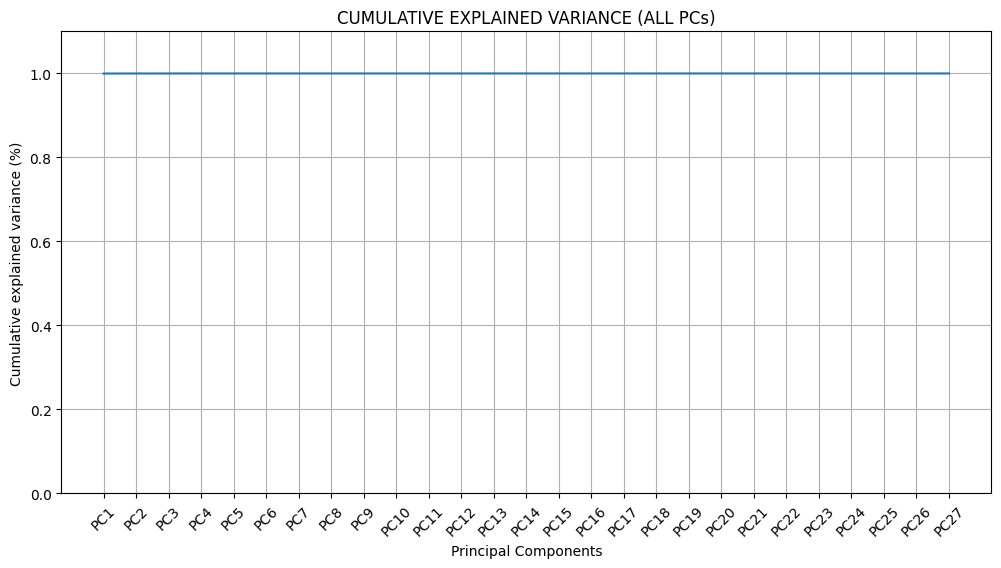

In [310]:
#3.3 Apply the “full” PCA1 to the DFs Xworkdf, Xworkdf std, and Xworkdf mm and plot
#the curve of the cumulative explained variance. Looking at the results, improve the
#analysis and comments made at the previous step.

# Initializa full PCA
pca_full = PCA()
# Fit the PCA
pca_full.fit_transform(Xworkdf.values)

# Cumulative Explained Variance Plot: Xworkdf
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title('CUMULATIVE EXPLAINED VARIANCE (ALL PCs)')
plt.xticks(ticks = np.arange(pca_full.n_features_),
           labels = [f'PC{i+1}' for i in range(pca_full.n_features_)],
           rotation=45)
plt.ylim([0, 1.1])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


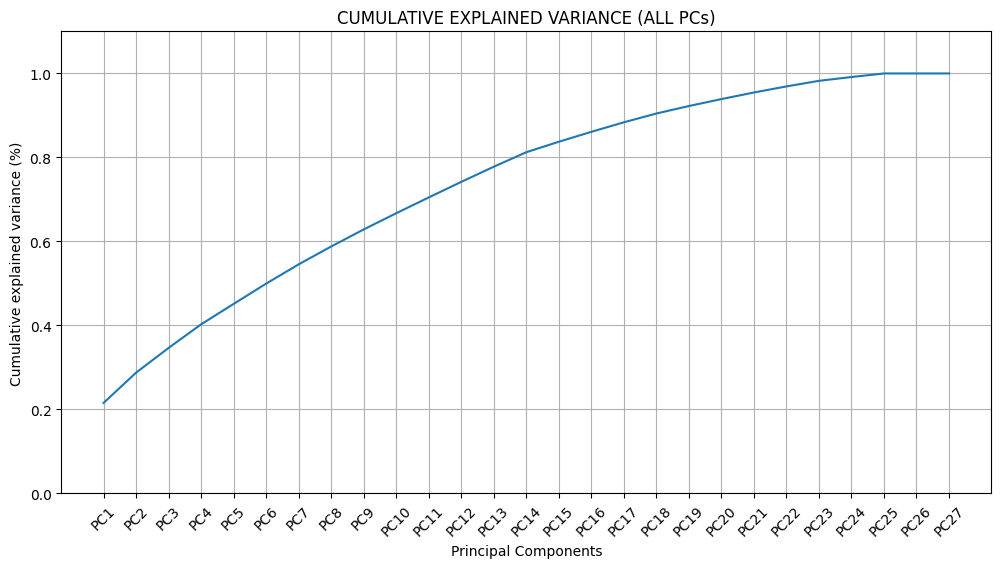

In [311]:
# Standard Scaled Xworkdf_std PCA
pca_std_full = PCA()
# Fit the PCA
pca_std_full.fit_transform(Xworkdf_std.values)

# Cumulative Explained Variance Plot: Xworkdf_std
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_std_full.explained_variance_ratio_))
plt.title('CUMULATIVE EXPLAINED VARIANCE (ALL PCs)')
plt.xticks(ticks = np.arange(pca_std_full.n_features_),
           labels = [f'PC{i+1}' for i in range(pca_std_full.n_features_)],
           rotation=45)
plt.ylim([0, 1.1])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


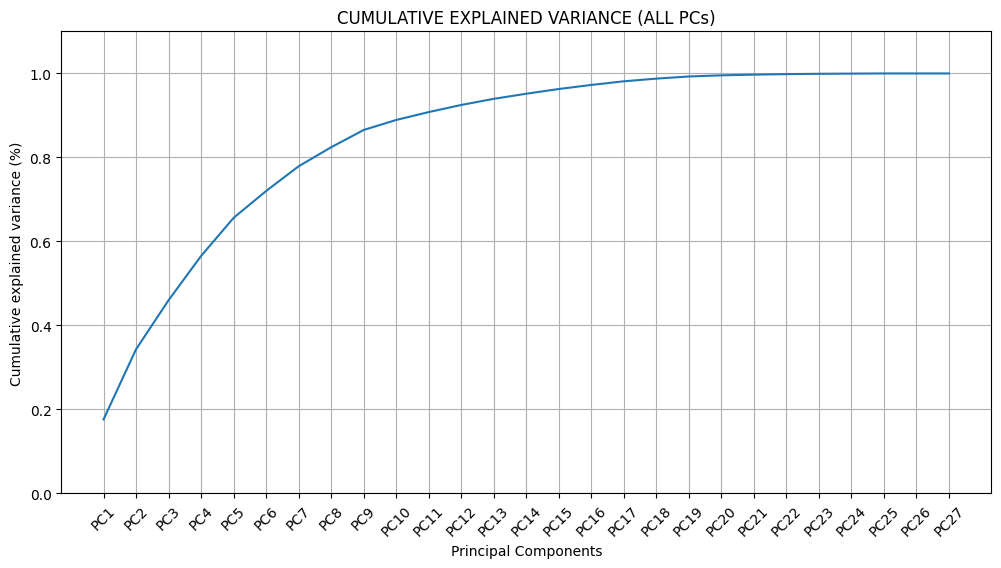

In [312]:
# MinMax Scaled Xworkdf_mm PCA
pca_mm_full = PCA()
# Fit the PCA
pca_mm_full.fit_transform(Xworkdf_mm.values)

# Cumulative Explained Variance Plot: Xworkdf_mm
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_mm_full.explained_variance_ratio_))
plt.title('CUMULATIVE EXPLAINED VARIANCE (ALL PCs)')
plt.xticks(ticks = np.arange(pca_mm_full.n_features_),
           labels = [f'PC{i+1}' for i in range(pca_mm_full.n_features_)],
           rotation=45)
plt.ylim([0, 1.1])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

We observe that:
>the cumulative explained variance plot of the _pca_full_ is constant, so all principal components contribute equally to the total variance.

>the cumulative explained variance plots of the _pca_full_std_ and _pca_full_mm_ grow not-linearly, so the contributes aren't the same for all the principal components but we see the first ones start from a value near to 0.2 reaching the value 1 at PC25 for _pca_full_std_ and at PC20 for _pca_full_mm_.

**4** Dimensionality Reduction and Interpretation of the PCs

We apply the PCA with m_std=3 and m_mm=2, then we plot the barplots of percentage of explained variance for _pca_std_ and _pca_mm_ with respect to the PCs.

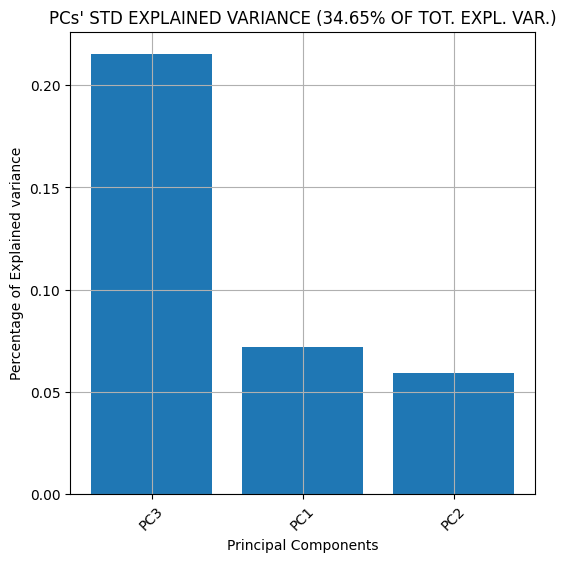

In [313]:
# Computes the minimum numbers of PC that explains the 33% of the total variance for Xworkdf_std (m1_std)
m1_std_threshold = 0.33
cumulative_variance_std = np.cumsum(pca_std_full.explained_variance_ratio_)
m1_std = np.argmax(cumulative_variance_std >= m1_std_threshold) + 1
# Computes m_std
m_std = min(m1_std, 5)

#Initializing PCA with m_std
pca_std = PCA(n_components=m_std)
#Fitting the PCA
pca_std.fit(Xworkdf_std.values)

round_expl_var_ratio_std = np.round(pca_std.explained_variance_ratio_.sum()*100,decimals=2)

# Barplot of Std: explained variance
plt.figure(figsize=(6, 6))
plt.bar(range(1,m_std+1),pca_std.explained_variance_ratio_)
plt.title(f"PCs' STD EXPLAINED VARIANCE ({round_expl_var_ratio_std}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1,m_std+1),
           labels={f'PC{i}' for i in range(1,m_std+1)},
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

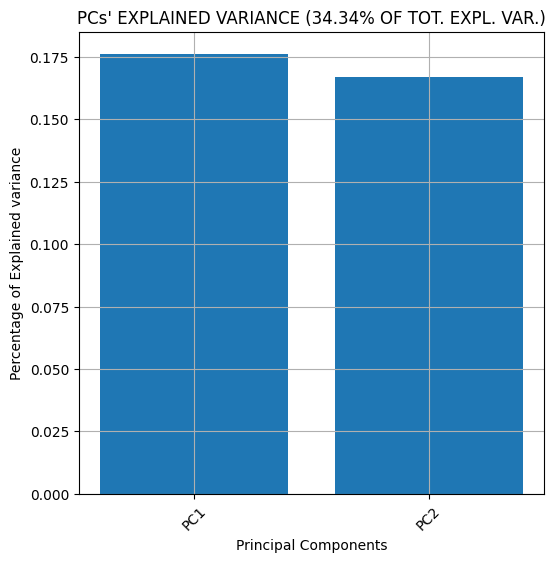

In [314]:
# Computes the minimum numbers of PC that explains the 33% of the total variance for Xworkdf_mm (m1_mm)
m1_mm_threshold = 0.33
cumulative_variance_mm = np.cumsum(pca_mm_full.explained_variance_ratio_)
m1_mm = np.argmax(cumulative_variance_mm >= m1_mm_threshold) + 1
#Computes m_mm
m_mm = min(m1_mm, 5)

#Initializing PCA with m_mm
pca_mm = PCA(n_components=m_mm)
#Fitting the PCA
pca_mm.fit(Xworkdf_mm.values)

round_expl_var_ratio_mm = np.round(pca_mm.explained_variance_ratio_.sum()*100,decimals=2)

# Barplot of Mm: Explained Variance
plt.figure(figsize=(6, 6))
plt.bar(range(1,m_mm+1),pca_mm.explained_variance_ratio_)
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio_mm}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1,m_mm+1),
           labels={f'PC{i}' for i in range(1,m_mm+1)},
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

We 'll find the PCs for both _pca_std_ and _pca_mm_ with the greatest contribute distinguishing them between high-valued positive and negative with respect to the threshold thanks to the graphs below.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


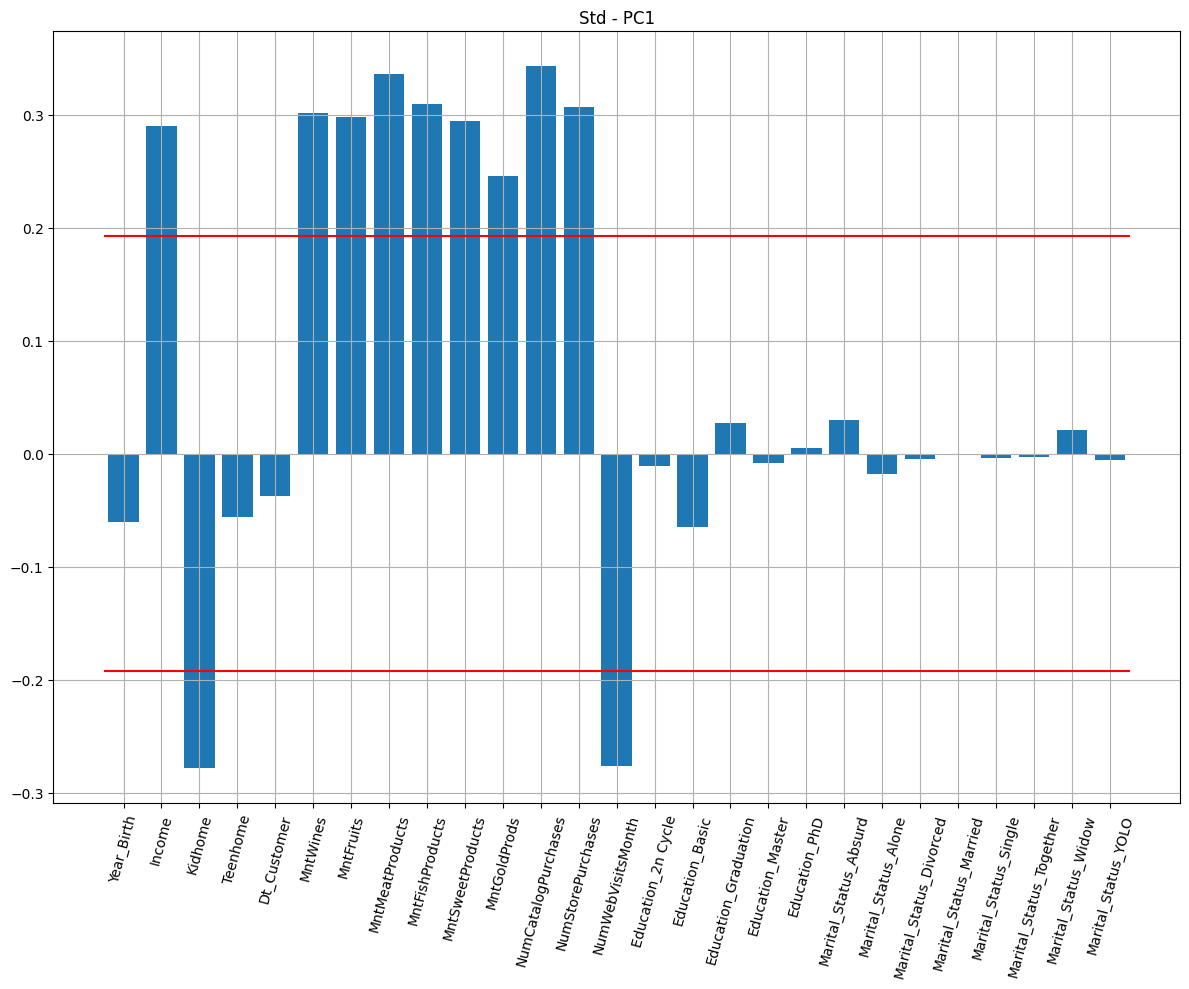


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases', 'NumStorePurchases']

HIGH-VALUED NEGATIVE COMPONENTS: ['Kidhome', 'NumWebVisitsMonth']
*********************************************



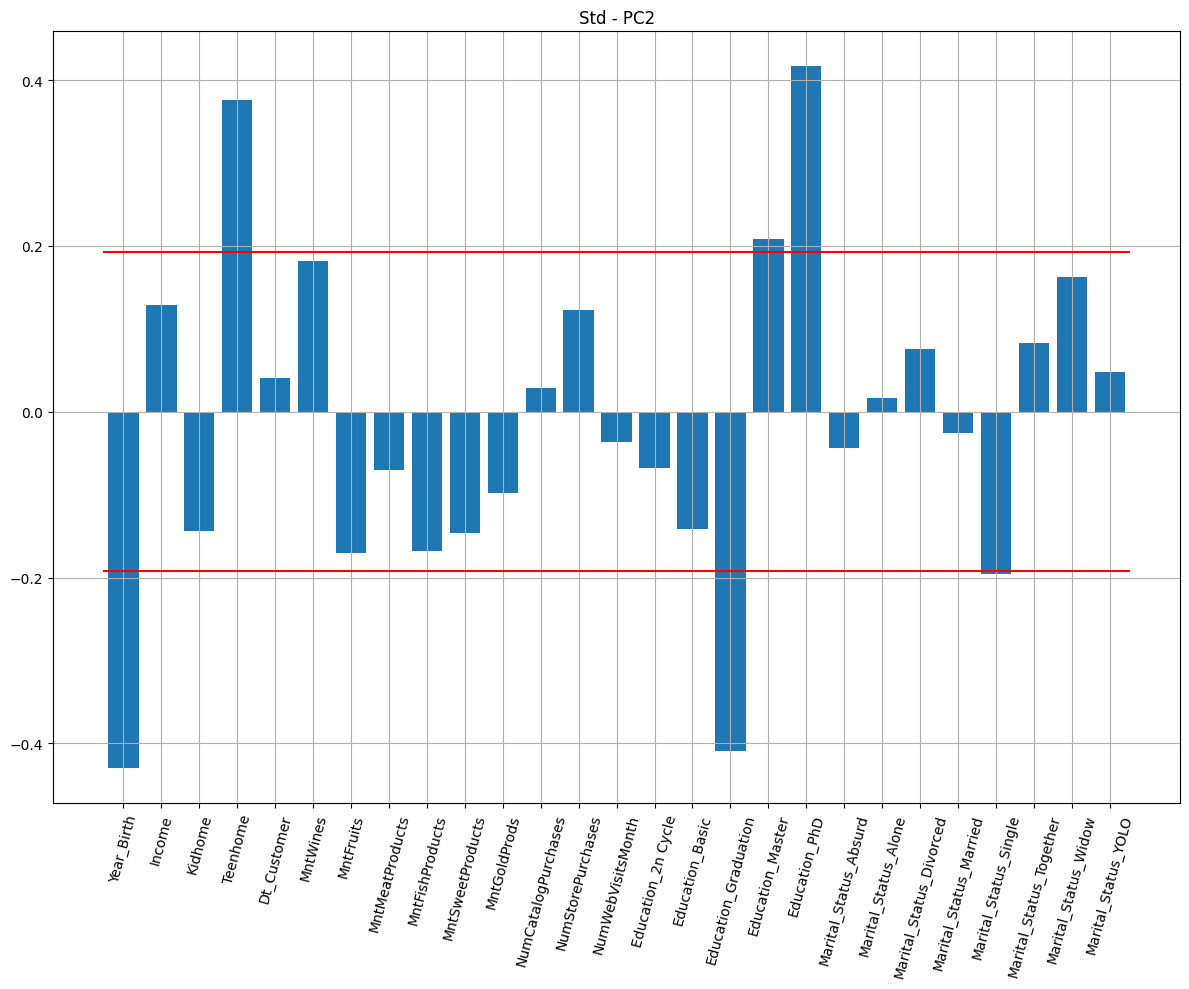


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Teenhome', 'Education_Master', 'Education_PhD']

HIGH-VALUED NEGATIVE COMPONENTS: ['Year_Birth', 'Education_Graduation', 'Marital_Status_Single']
*********************************************



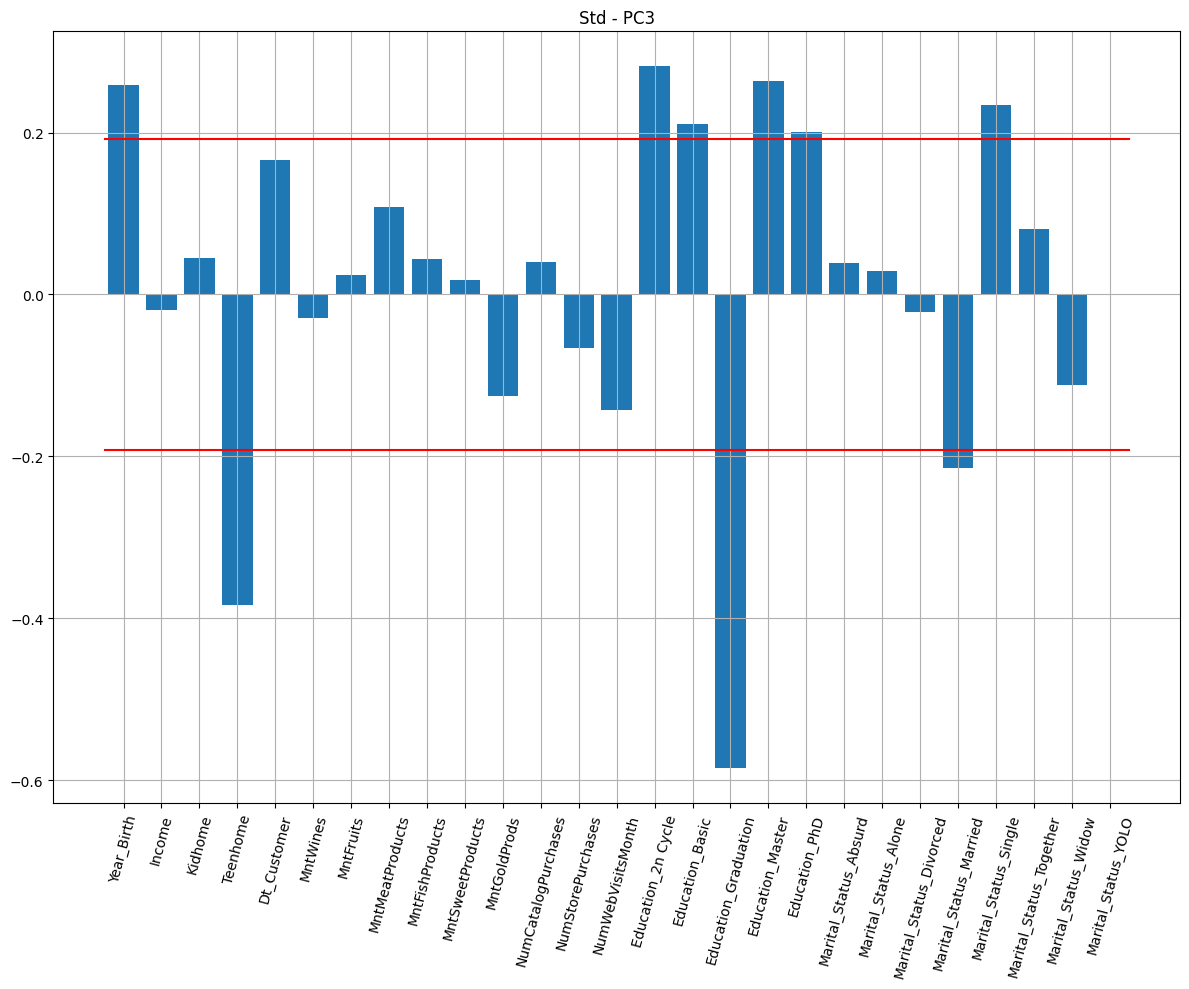


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Year_Birth', 'Education_2n Cycle', 'Education_Basic', 'Education_Master', 'Education_PhD', 'Marital_Status_Single']

HIGH-VALUED NEGATIVE COMPONENTS: ['Teenhome', 'Education_Graduation', 'Marital_Status_Married']
*********************************************



In [315]:
#StandardScaler
eps = np.sqrt(1 / pca_std.n_features_)
for ii in range(m_std):
    # MAKE THE VARPLOT
    plt.figure(figsize=(12, 10))
    plt.bar(np.arange(pca_std.n_features_), pca_std.components_[ii, :])

    #Eed Line for the Threshold
    plt.plot([-0.5, pca_std.n_features_ - 0.5], [eps, eps], 'red')
    plt.plot([-0.5, pca_std.n_features_ - 0.5], [-eps, -eps], 'red')
    plt.xticks(ticks = np.arange(pca_std.n_features_),
               labels = Xworkdf_std.columns,
               rotation=75)
    plt.title(f'Std - PC{ii + 1}')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Selection of the features
    ind_great_pos_PCii = np.argwhere(pca_std.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_std.components_[ii, :] <= -eps).flatten()

    great_pos_PCii = [Xworkdf_std.columns[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [Xworkdf_std.columns[i] for i in ind_great_neg_PCii]

    print('')
    print(f'****************** PC{ii + 1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('*********************************************')
    print('')


We assign the PCs Names for _pca_std_, we observe that they are correlated to three factors:


*   Marital Status
*   Education
*   Purchase Methods

We'll focus our analysis on them.

In [316]:
#Std: PCs names
pc_names_std=['  Online Shoppers (-) vs Offline Purchasers (+)',
              ' Graduated (-) vs Researchers (+) ',
            ' Families (-) vs Unmarried (+) ']

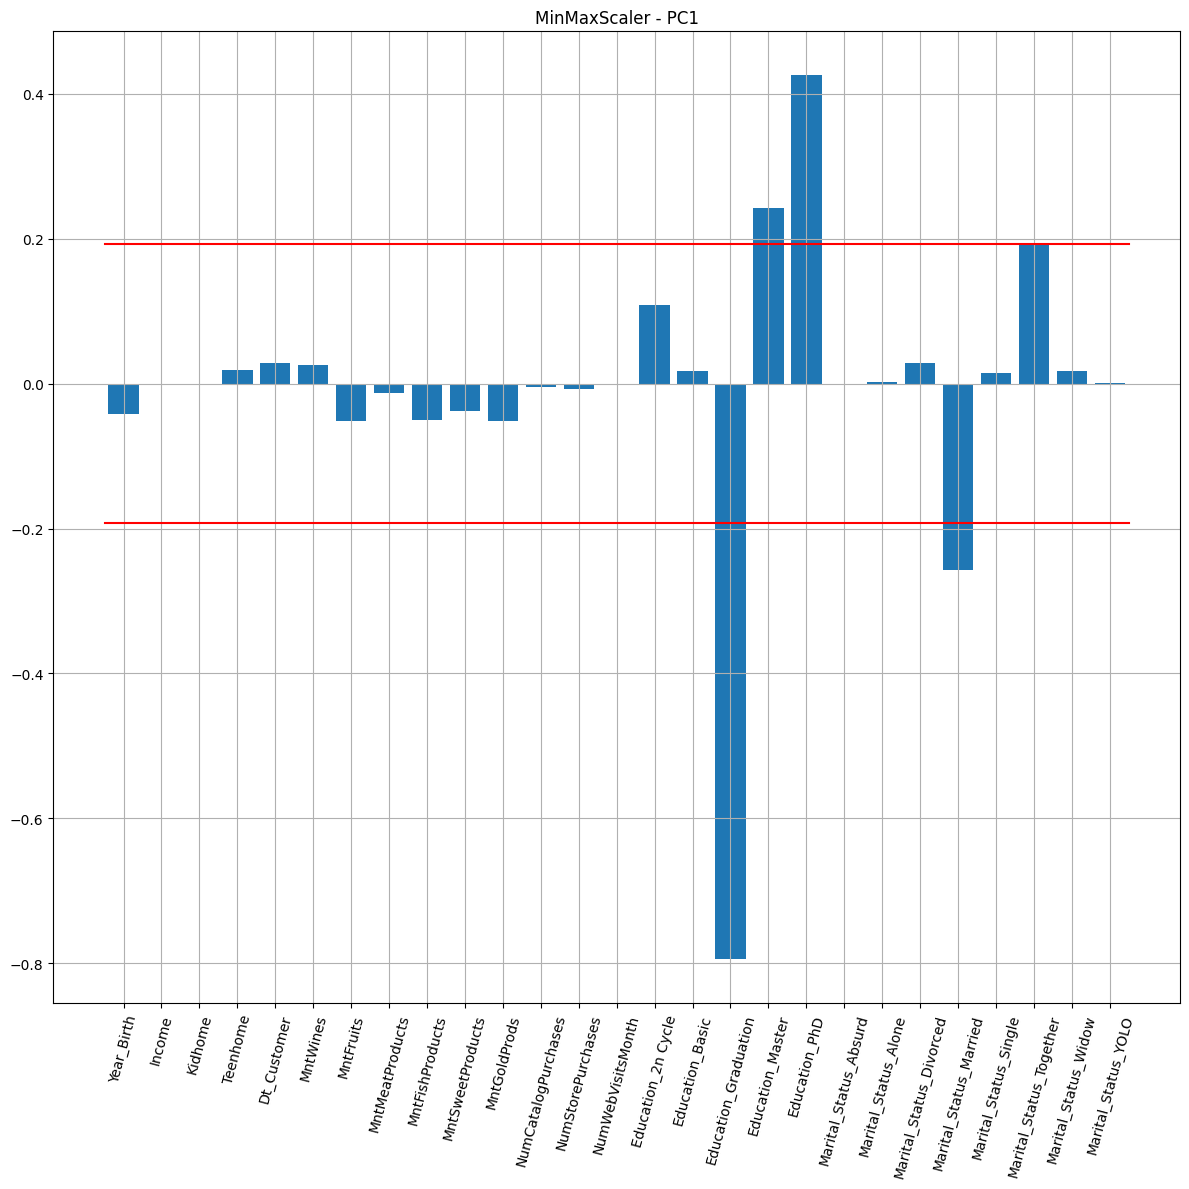


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Education_Master', 'Education_PhD', 'Marital_Status_Together']

HIGH-VALUED NEGATIVE COMPONENTS: ['Education_Graduation', 'Marital_Status_Married']
*********************************************



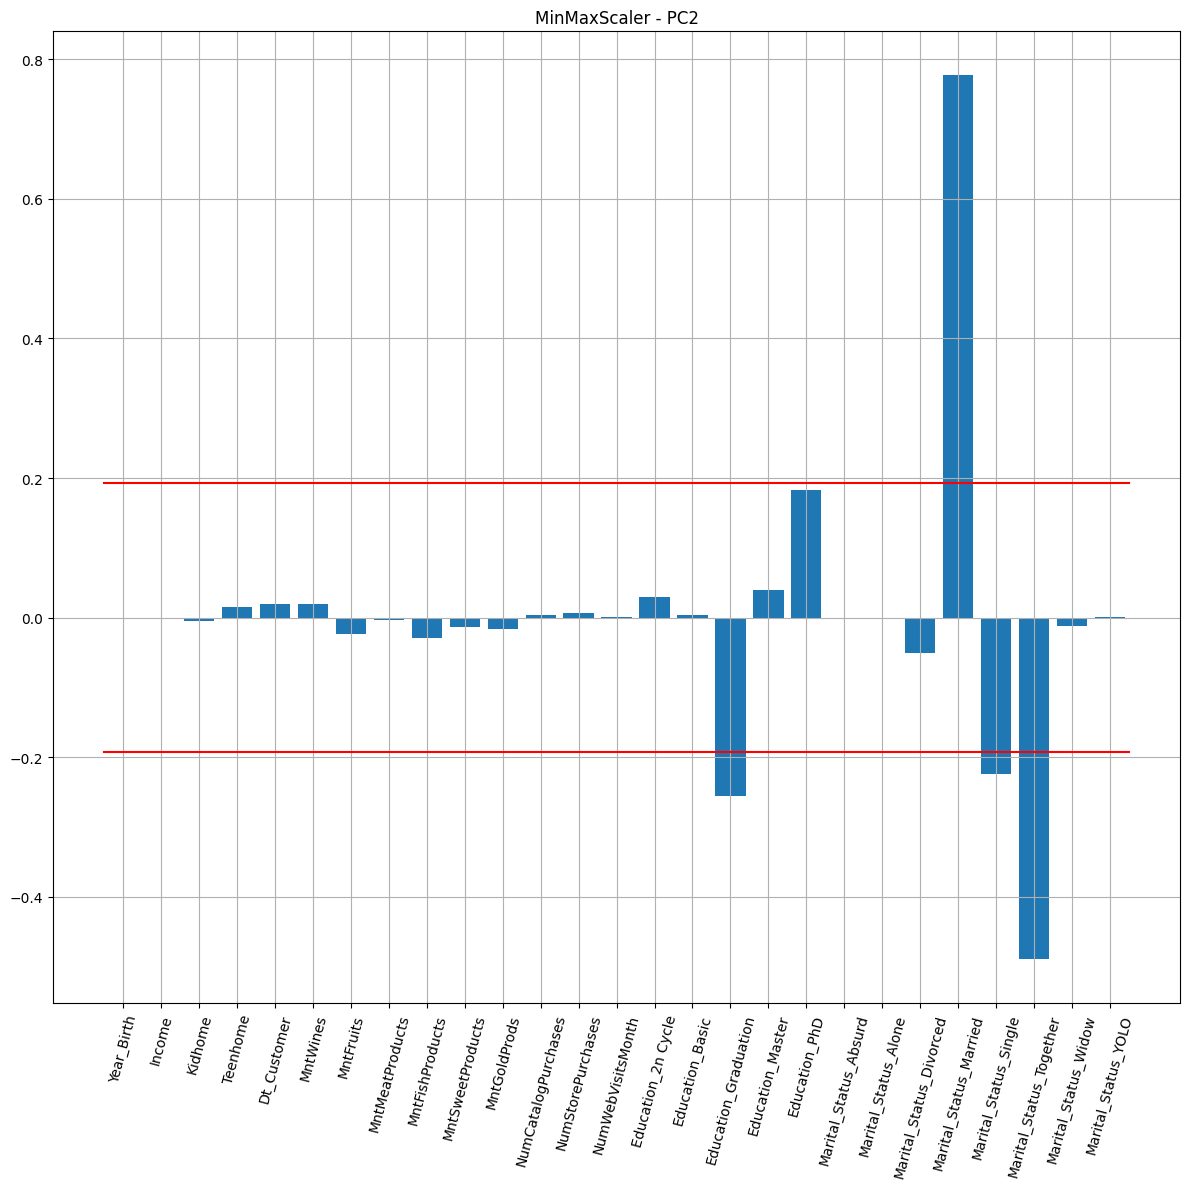


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Marital_Status_Married']

HIGH-VALUED NEGATIVE COMPONENTS: ['Education_Graduation', 'Marital_Status_Single', 'Marital_Status_Together']
*********************************************



In [317]:
#MinMax
eps = np.sqrt(1 / pca_mm.n_features_)
for ii in range(m_mm):
    # MAKE THE VARPLOT
    plt.figure(figsize=(12, 12))
    plt.bar(np.arange(pca_mm.n_features_), pca_mm.components_[ii, :])
    #Red Line for Threshold
    plt.plot([-0.5, pca_mm.n_features_ - 0.5], [eps, eps], 'red')
    plt.plot([-0.5, pca_mm.n_features_ - 0.5], [-eps, -eps], 'red')
    plt.xticks(ticks=np.arange(pca_mm.n_features_),
               labels=Xworkdf_std.columns,
               rotation=75)
    plt.title(f'MinMaxScaler - PC{ii + 1}')
    plt.grid()
    plt.tight_layout()
    plt.show()

    #Selection of the features
    ind_great_pos_PCii = np.argwhere(pca_mm.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_mm.components_[ii, :] <= -eps).flatten()

    great_pos_PCii = [Xworkdf_mm.columns[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [Xworkdf_mm.columns[i] for i in ind_great_neg_PCii]

    print('')
    print(f'****************** PC{ii + 1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('*********************************************')
    print('')


We assign the PCs Names for _pca_mm_, we observe that they are correlated to two factors:


*   Marital Status
*   Education

We'll focus our analysis on them.

In [318]:
#Mm: PCs names
pc_names_mm=['  Graduated (-) vs Academics (+)',
             ' Unmarried (-) vs Married (+)']

Let's represent both the DFs with a score graph.

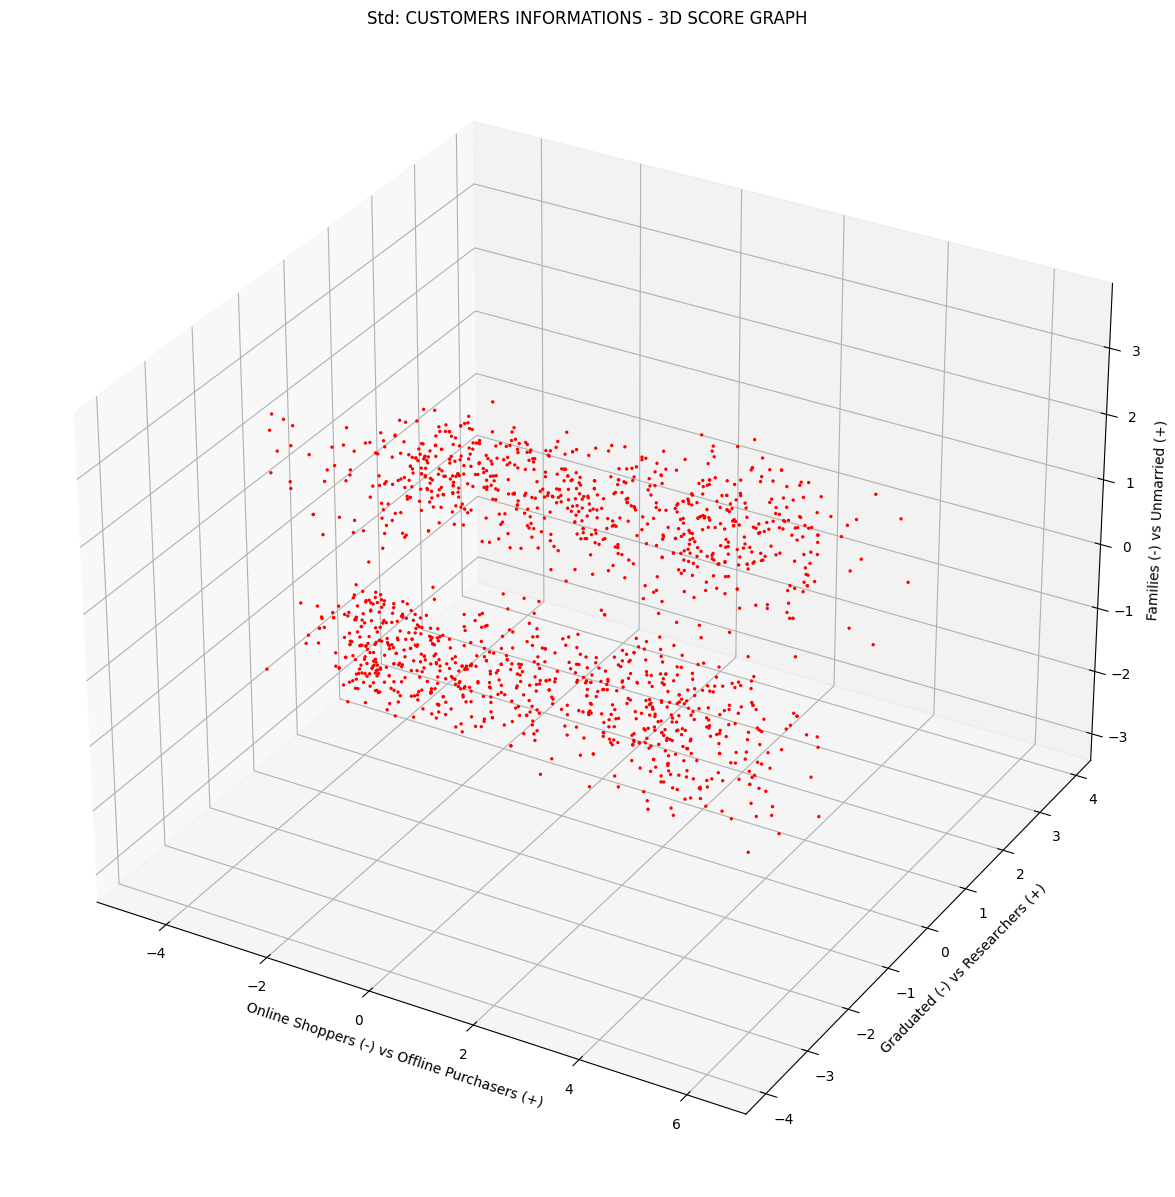

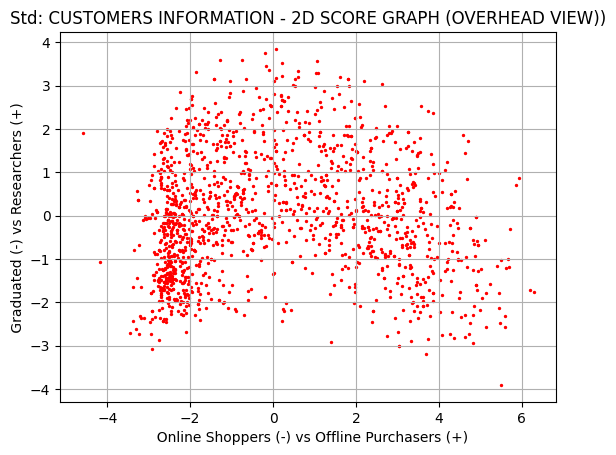

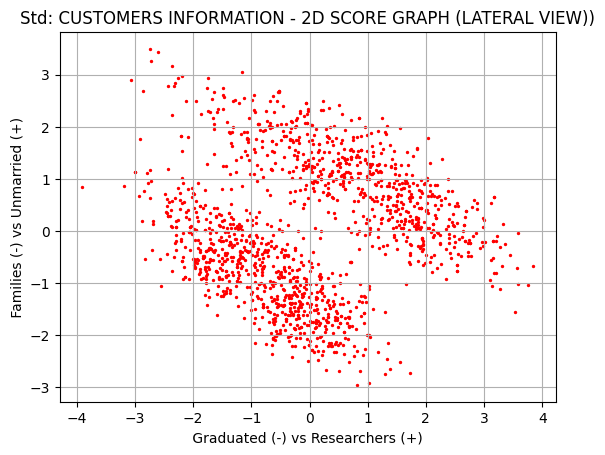

In [319]:
# After the interpretation, for both the DFs represent a score graph with respect to the first ℓ PCs,
#where ℓ = 2 if m = 2 and ℓ = 3 if m >= 3. In particular, write the names of the PCs (chosen by you)
#on the axes of the plots;

#Std
YStd = pca_std.transform(Xworkdf_std.values)

# 3D Score Graph
sg_3d = plt.figure(figsize=(15, 15))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(YStd[:, 0], YStd[:, 1], YStd[:, 2], s=2, alpha=1, c='red')
plt.title('Std: CUSTOMERS INFORMATIONS - 3D SCORE GRAPH')
ax_sg_3d.set_xlabel(pc_names_std[0])
ax_sg_3d.set_ylabel(pc_names_std[1])
ax_sg_3d.set_zlabel(pc_names_std[2])
plt.grid()
plt.show()

# 2D Score Graph
plt.figure()
plt.scatter(YStd[:, 0], YStd[:, 1], s=2, alpha=1, c='red')
plt.title('Std: CUSTOMERS INFORMATION - 2D SCORE GRAPH (OVERHEAD VIEW))')
plt.xlabel(pc_names_std[0])
plt.ylabel(pc_names_std[1])
plt.grid()
plt.show()

# 2D Score Graph
plt.figure()
plt.scatter(YStd[:, 1], YStd[:, 2], s=2, alpha=1, c='red')
plt.title('Std: CUSTOMERS INFORMATION - 2D SCORE GRAPH (LATERAL VIEW))')
plt.xlabel(pc_names_std[1])
plt.ylabel(pc_names_std[2])
plt.grid()
plt.show()

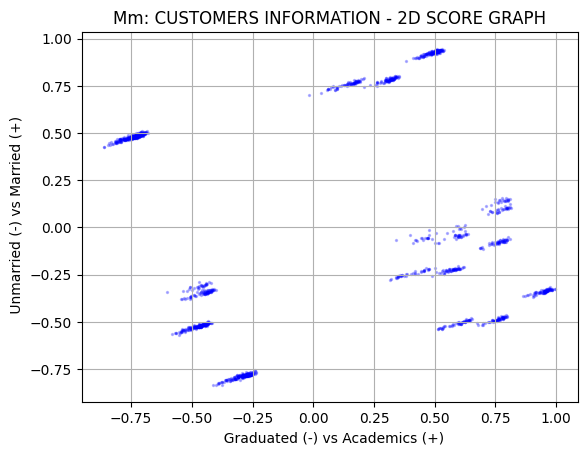

In [320]:
#Mm
Ymm = pca_mm.transform(Xworkdf_mm.values)

# Mm: 2D Score Graph
plt.figure()
plt.scatter(Ymm[:,0],Ymm[:,1], s=2, c='blue', alpha=0.25)
plt.title('Mm: CUSTOMERS INFORMATION - 2D SCORE GRAPH')
plt.xlabel(pc_names_mm[0])
plt.ylabel(pc_names_mm[1])
plt.grid()
plt.show()

Now let's plot again the score graphs of both Dfs taking attention to two labels we consider important:


*   NumDealsPurchases
*   Recency

We want to visualize if there is any correlation between the PCs and the customers' purchasing behaviour.


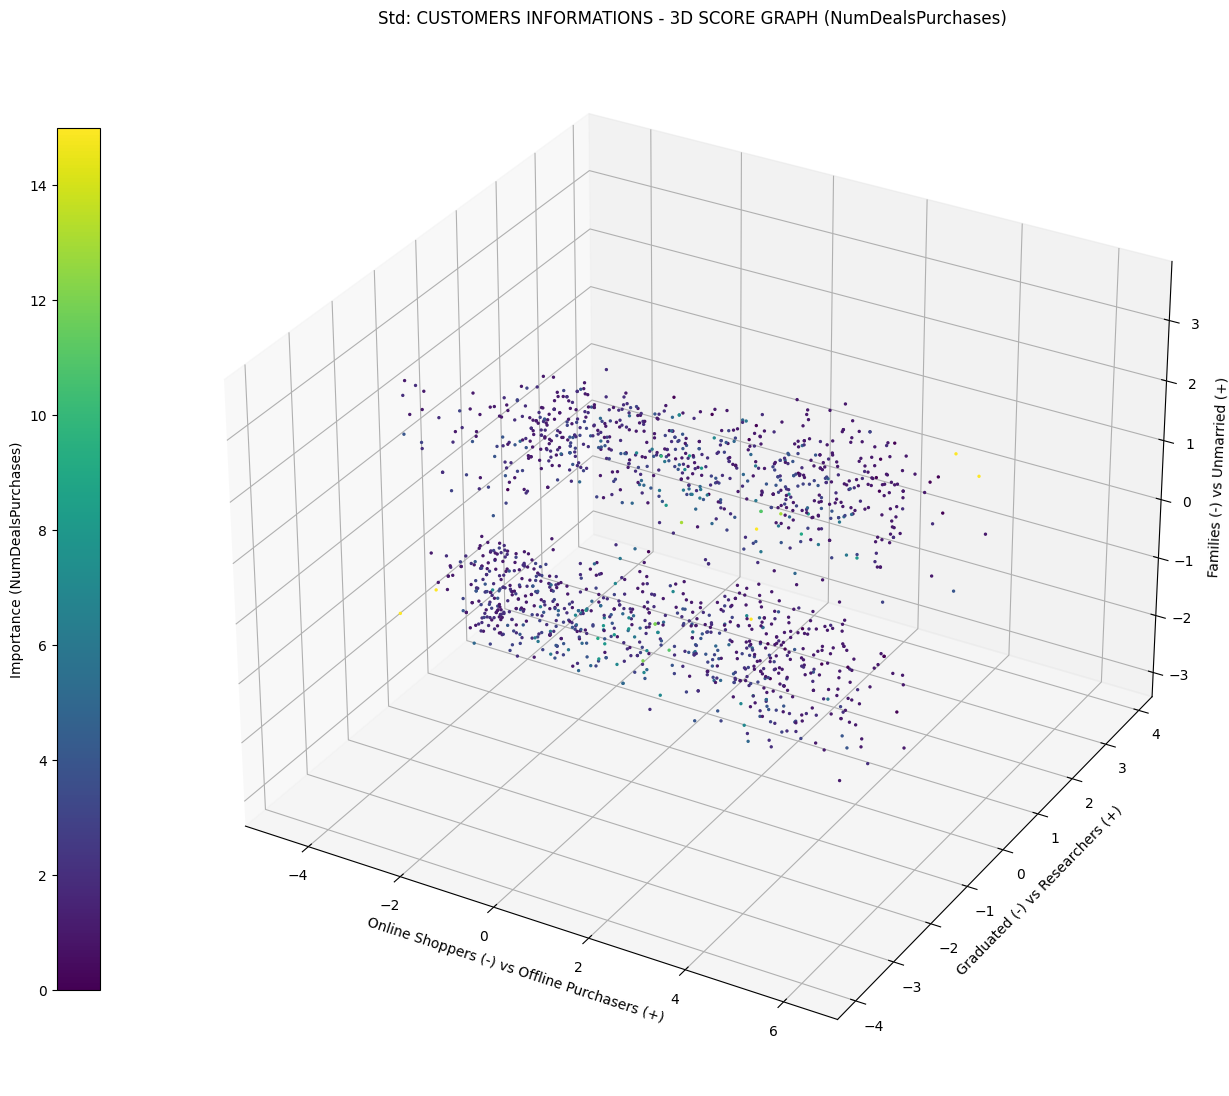

In [321]:
meaningful_labels = ['NumDealsPurchases', 'Recency']

def plot_3d_score_graph(ax, intensity, label):
    # 3D plot
    scatter = ax.scatter(YStd[:, 0], YStd[:, 1], YStd[:, 2], s=2, alpha=1, c=intensity, cmap='viridis')
    ax.set_xlabel(pc_names_std[0])
    ax.set_ylabel(pc_names_std[1])
    ax.set_zlabel(pc_names_std[2])
    ax.set_title(f'Std: CUSTOMERS INFORMATIONS - 3D SCORE GRAPH ({label})')
    ax.grid()
    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax, label=f'Importance ({label})', pad=0.05, shrink=0.7, location='left')
    cbar.ax.yaxis.set_ticks_position('left')

#Std - NumDealsPurchases
intensity_label1 = workdf[meaningful_labels[0]]
# 3D plot
fig_sg_3d_label1 = plt.figure(figsize=(17, 16))
ax_sg_3d_label1 = fig_sg_3d_label1.add_subplot(111, projection='3d')
plot_3d_score_graph(ax_sg_3d_label1, intensity_label1, meaningful_labels[0])
plt.show()

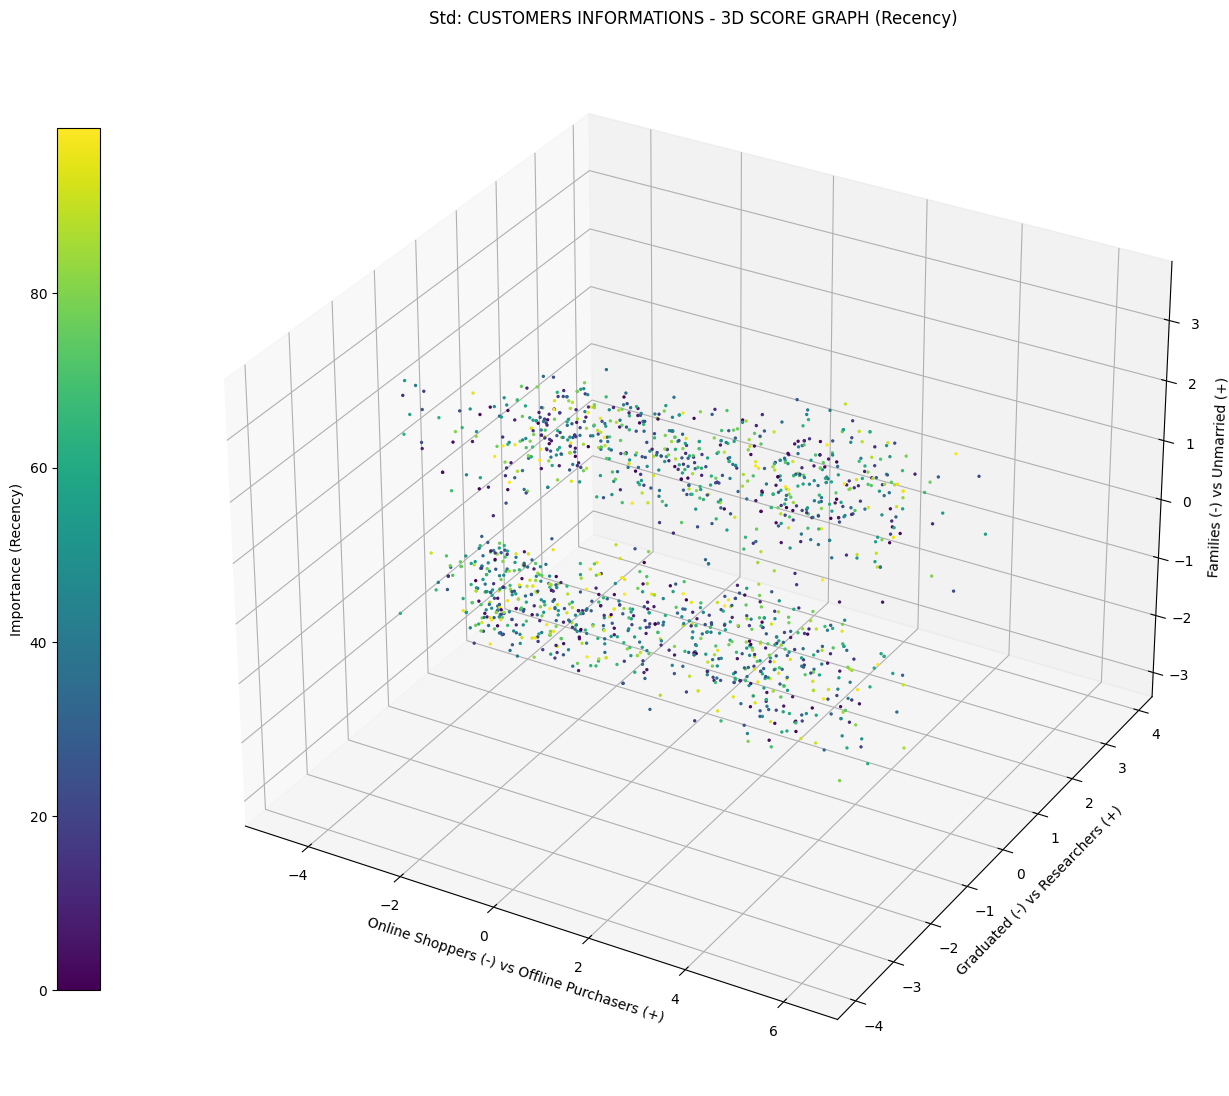

In [322]:
#Std - Recency
intensity_label2 = workdf[meaningful_labels[1]]
#3D Score Graph
fig_sg_3d_label2 = plt.figure(figsize=(17, 16))
ax_sg_3d_label2 = fig_sg_3d_label2.add_subplot(111, projection='3d')
plot_3d_score_graph(ax_sg_3d_label2, intensity_label2, meaningful_labels[1])
plt.show()

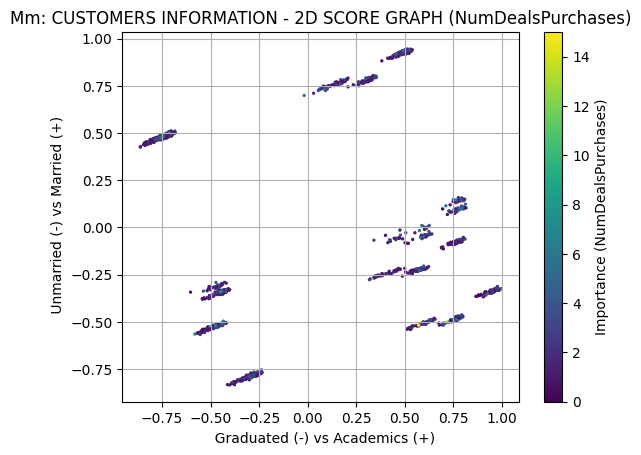

In [323]:
#Mm: NumDealsPurchases
intensity_label1 = workdf[meaningful_labels[0]]

# 2D Score Graph
plt.figure()
plt.scatter(Ymm[:, 0], Ymm[:, 1], s=2, c=intensity_label1, cmap='viridis', alpha=1)
plt.title(f'Mm: CUSTOMERS INFORMATION - 2D SCORE GRAPH ({meaningful_labels[0]})')
plt.xlabel(pc_names_mm[0])
plt.ylabel(pc_names_mm[1])
plt.grid()
plt.colorbar(label=f'Importance ({meaningful_labels[0]})')
plt.show()


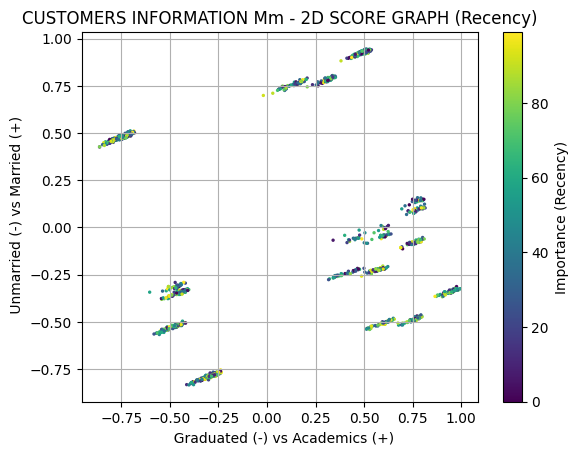

In [324]:
#Mm: Recency
intensity_label2 = workdf[meaningful_labels[1]]

# 2D Score Graph
plt.figure()
plt.scatter(Ymm[:, 0], Ymm[:, 1], s=2, c=intensity_label2, cmap='viridis', alpha=1)
plt.title(f'CUSTOMERS INFORMATION Mm - 2D SCORE GRAPH ({meaningful_labels[1]})')
plt.xlabel(pc_names_mm[0])
plt.ylabel(pc_names_mm[1])
plt.grid()
plt.colorbar(label=f'Importance ({meaningful_labels[1]})')
plt.show()

Since the labels are homogeneously distributed among the dots, we don't observe any correlation between the characteristics of the customers and the purchases made with a discount or the number of days since the last purchase.

**5** k-Means Algorithm

Let's run the k-Means Algorithm on the two DFs. We'll select the best value of _k _std_ and _k _mm_ using the silhouette score.

In [325]:
#Run the k-Means algorithm on the two DFs, with respect to the
#“PC-space”. Select the best value of k P t3, . . . , 10 using the silhouette coefficient.

#Std

# Initialization of the lists
km_list_std = []
silcoeff_list_std = []
k_list_std = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list_std)):
    print(f'****************** START k-MEANS WITH k={k_list_std[i]} ******************')
    print('Computing...')
    km_list_std.append(KMeans(n_clusters=k_list_std[i], n_init=10, random_state=rs))
    #playing with kmeans parameters
    #km_list_std.append(KMeans(n_clusters=k_list_std[i], n_init=10, algorithm='lloyd', random_state=rs)) #k_std = 9
    #km_list_std.append(KMeans(n_clusters=k_list_std[i], n_init=10, algorithm='elkan', random_state=rs)) #k_std = 6
    #km_list_std.append(KMeans(n_clusters=k_list_std[i], n_init=10, max_iter=5, random_state=rs)) #k_std = 6
    #km_list_std.append(KMeans(n_clusters=k_list_std[i], n_init=10, verbose=1, random_state=rs)) #k_std = 6
    km = km_list_std[i]
    km.fit(YStd)
    silcoeff_list_std.append(silhouette_score(YStd, km.labels_))
    print(f'****************** END k-MEANS WITH k={k_list_std[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best_std = np.argmax(silcoeff_list_std)
k_std = k_list_std[i_best_std]
km_std = km_list_std[i_best_std]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list_std)} --> k_std= {k_std}')
print('**************************************************************')


****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


In [326]:
#Mm

# Initialization of the lists
km_list_mm = []
silcoeff_list_mm = []
k_list_mm = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list_mm)):
    print(f'****************** START k-MEANS WITH k={k_list_mm[i]} ******************')
    print('Computing...')
    km_list_mm.append(KMeans(n_clusters=k_list_mm[i], n_init=10, random_state=rs))
    km = km_list_mm[i]
    km.fit(Ymm)
    silcoeff_list_mm.append(silhouette_score(Ymm, km.labels_, metric = 'euclidean'))
    print(f'****************** END k-MEANS WITH k={k_list_mm[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best_mm = np.argmax(silcoeff_list_mm)
k_mm = k_list_mm[i_best_mm]
km_mm = km_list_mm[i_best_mm]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list_mm)} --> k_mm = {k_mm}')
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


We obtain the following results for the best k values:
>k_std= 6 with a silhouette score of 0.35691 which far from 1, so leads us to expect low inter-cluster and high intra-cluster distance.

>k_mm=4 with a silhouette score of 0.79052 that is really good since is near to 1, so we expect well-defined and distant clusters with high inter-cluster distance.

We also tried to add to the kMeans class some parameters, like:


*   algorithm: we ran the kMeans with the Lloyd algorithm obtaining a k_std=9 (therefore 3 more cluster) and with the Elkan algorithm obtaining a k_std=6
*   max_iter: we set a max number of iteration equal to obtaining a k_std=6
*   verbose: gave us more informations about each iteration






**6** Clusters and Centroid Interpretation and Visualization

Let's plot the score graphs of point 4 with the centroids and the barplots for each cluster with the values with respect to every PC for both the dataframes.

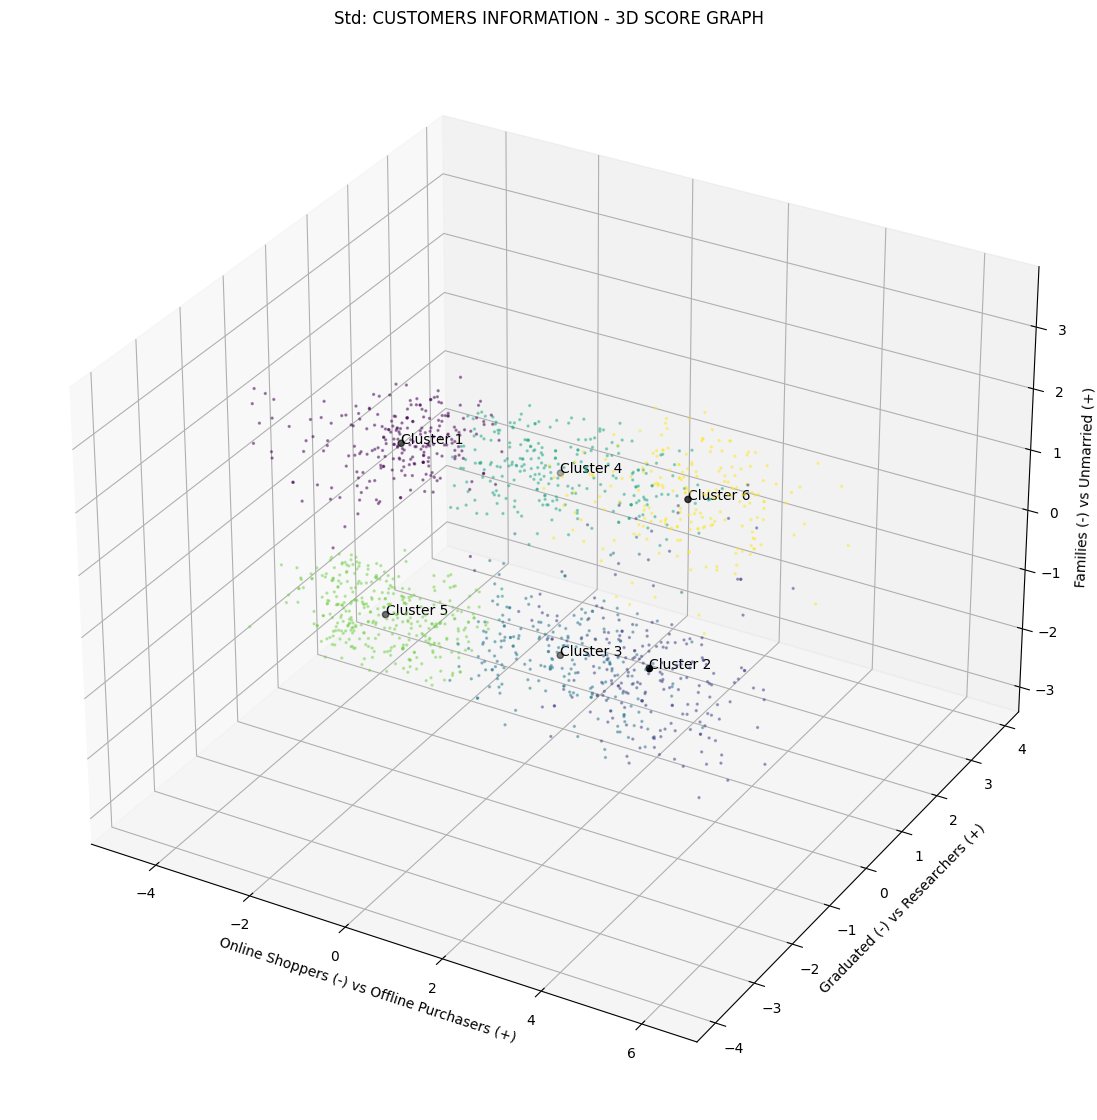

In [327]:
#Comment the centroids of the best clustering for both the DFs;
#Plot the score graph of exercise 4 together with the centroids. In particular, show
#the different clusters using different colors and/or markers for the dots.

#Std
# 3D Score Graph with centroids
sg_3d_km = plt.figure(figsize=(14, 14))
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection='3d')
scatter = ax_sg_3d_km.scatter(YStd[:, 0], YStd[:, 1], YStd[:, 2], s=2, c=km_std.labels_, alpha=0.4, label='Data Points')
ax_sg_3d_km.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black', label='Cluster Centers')
for kk in range(k_std):
    ax_sg_3d_km.text(km_std.cluster_centers_[kk, 0], km_std.cluster_centers_[kk, 1], km_std.cluster_centers_[kk, 2], f'Cluster {kk+1}', color='black')
plt.title('Std: CUSTOMERS INFORMATION - 3D SCORE GRAPH')
ax_sg_3d_km.set_xlabel(pc_names_std[0])
ax_sg_3d_km.set_ylabel(pc_names_std[1])
ax_sg_3d_km.set_zlabel(pc_names_std[2])
plt.grid()
plt.show()

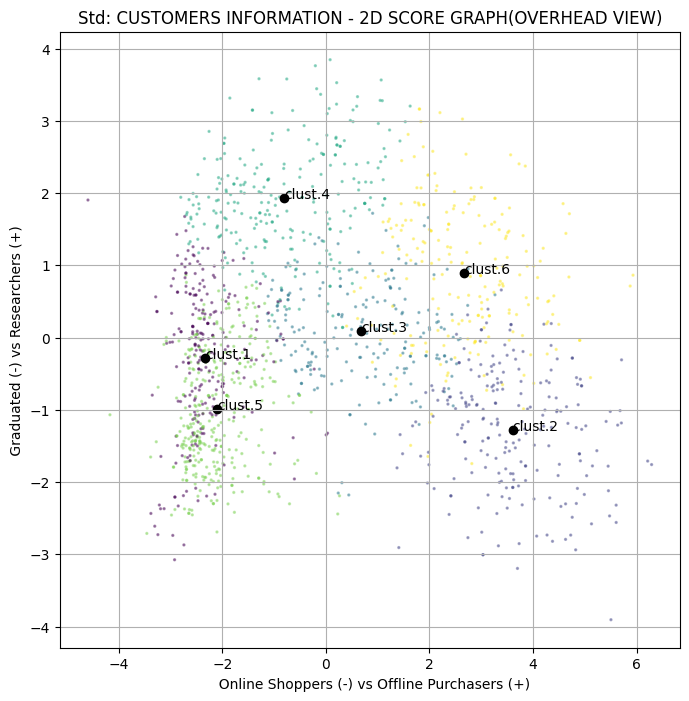

In [328]:
#2D Score Graph with centroids
sg_2d_km = plt.figure(figsize=(8, 8))
ax_sg_2d_km = sg_2d_km.add_subplot(111)
ax_sg_2d_km.scatter(YStd[:, 0], YStd[:, 1], s=2, c=km_std.labels_, alpha=0.4)
ax_sg_2d_km.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], c='black')
for kk in range(k_std):
    ax_sg_2d_km.text(km_std.cluster_centers_[kk, 0], km_std.cluster_centers_[kk, 1], f'clust.{kk+1}')
plt.title('Std: CUSTOMERS INFORMATION - 2D SCORE GRAPH(OVERHEAD VIEW)')
ax_sg_2d_km.set_xlabel(pc_names_std[0])
ax_sg_2d_km.set_ylabel(pc_names_std[1])
plt.grid()
plt.show()

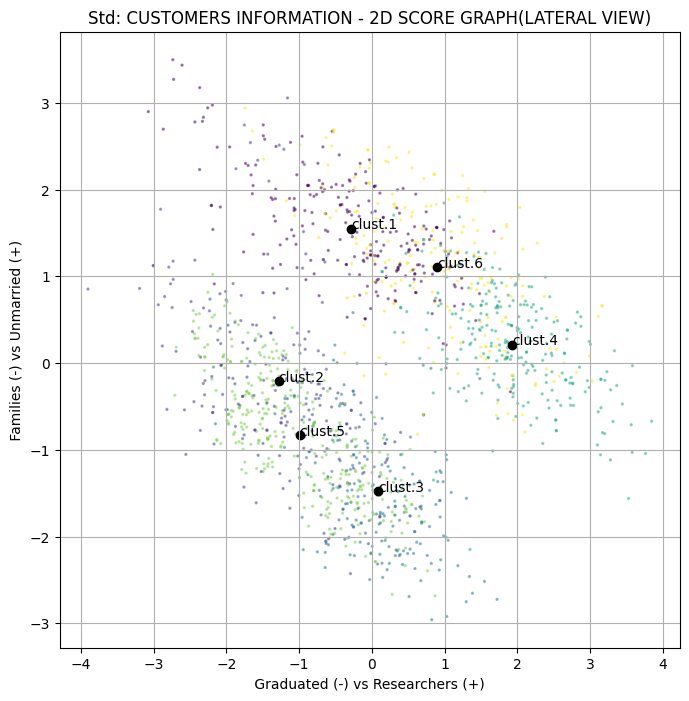

In [329]:
#2D Score Graph with centroids
sg_2d_km = plt.figure(figsize=(8, 8))
ax_sg_2d_km = sg_2d_km.add_subplot(111)
ax_sg_2d_km.scatter(YStd[:, 1], YStd[:, 2], s=2, c=km_std.labels_, alpha=0.4)
ax_sg_2d_km.scatter(km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black')
for kk in range(k_std):
    ax_sg_2d_km.text(km_std.cluster_centers_[kk, 1], km_std.cluster_centers_[kk, 2], f'clust.{kk+1}')
plt.title('Std: CUSTOMERS INFORMATION - 2D SCORE GRAPH(LATERAL VIEW)')
ax_sg_2d_km.set_xlabel(pc_names_std[1])
ax_sg_2d_km.set_ylabel(pc_names_std[2])
plt.grid()
plt.show()

As we predicted in the Silhouette score, the clusters aren't well divided from each other and the elements of each of them are not compact.

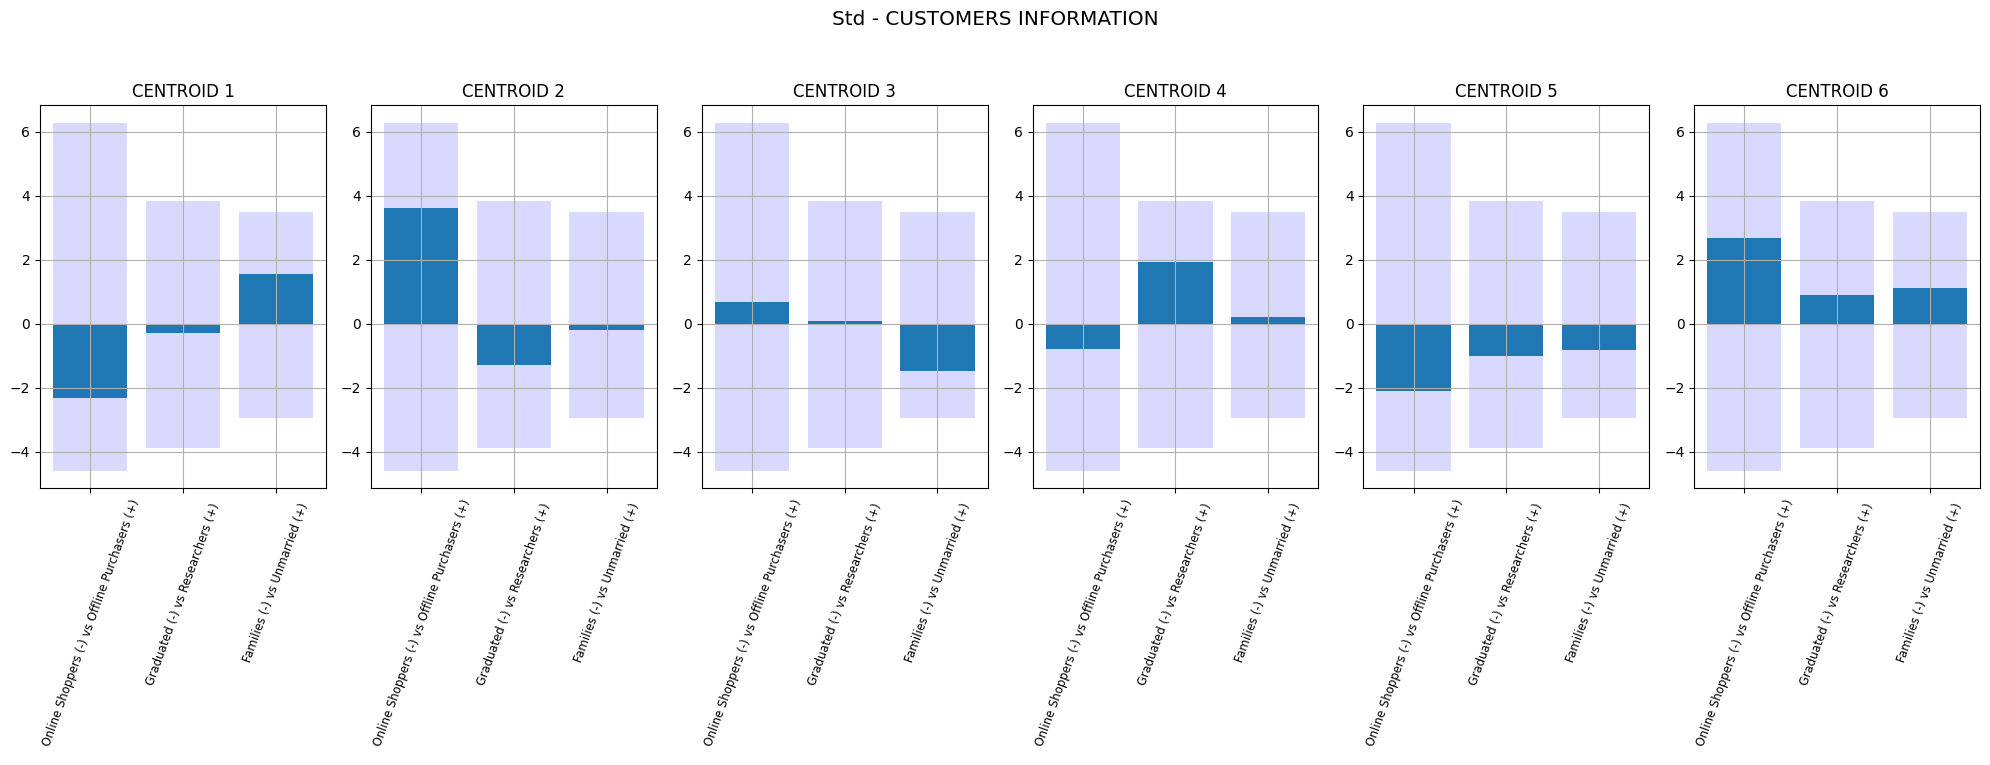

In [330]:
#Std
# Max/Min value in the PCs-space
maxs_y = YStd.max(axis=0)
mins_y = YStd.min(axis=0)

# Barplot of the centroids
fig_centroids, ax_centroids = plt.subplots(1, 6, figsize=(20, 8))
fig_centroids.suptitle('Std - CUSTOMERS INFORMATION', fontsize='x-large')
for ii in range(k_std):
    ax = ax_centroids[ii]
    ax.bar(np.arange(km_std.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax.bar(np.arange(km_std.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax.bar(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])
    ax.set_xticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax.set_xticklabels(labels=pc_names_std, rotation=70, fontsize='small')
    ax.tick_params(axis='x', which='both', labelsize='small')
    ax.grid(visible=True, which='both')
    ax.set_title(f'CENTROID {ii+1}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

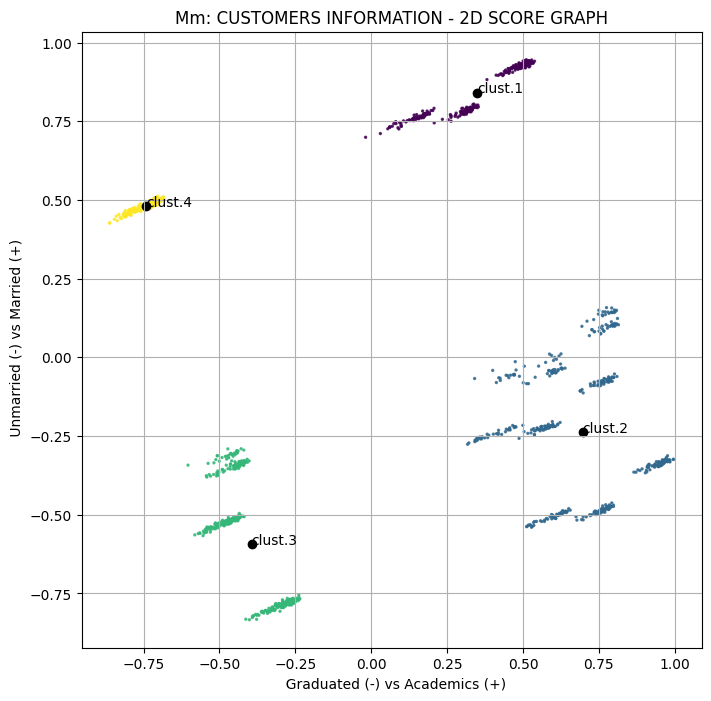

In [331]:
#Mm
#2D Score Graph with centroids
sg_2d_km = plt.figure(figsize=(8, 8))
ax_sg_2d_km = sg_2d_km.add_subplot(111)
ax_sg_2d_km.scatter(Ymm[:, 0], Ymm[:, 1], s=2, c=km_mm.labels_, alpha=0.8)
ax_sg_2d_km.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], c='black')
for kk in range(k_mm):
    ax_sg_2d_km.text(km_mm.cluster_centers_[kk, 0], km_mm.cluster_centers_[kk, 1], f'clust.{kk+1}')
plt.title('Mm: CUSTOMERS INFORMATION - 2D SCORE GRAPH')
ax_sg_2d_km.set_xlabel(pc_names_mm[0])
ax_sg_2d_km.set_ylabel(pc_names_mm[1])
plt.grid()
plt.show()

Consistently with the silhouette score analysis, the clusters are very distant from each other and the elements that compose them are very close and compact.

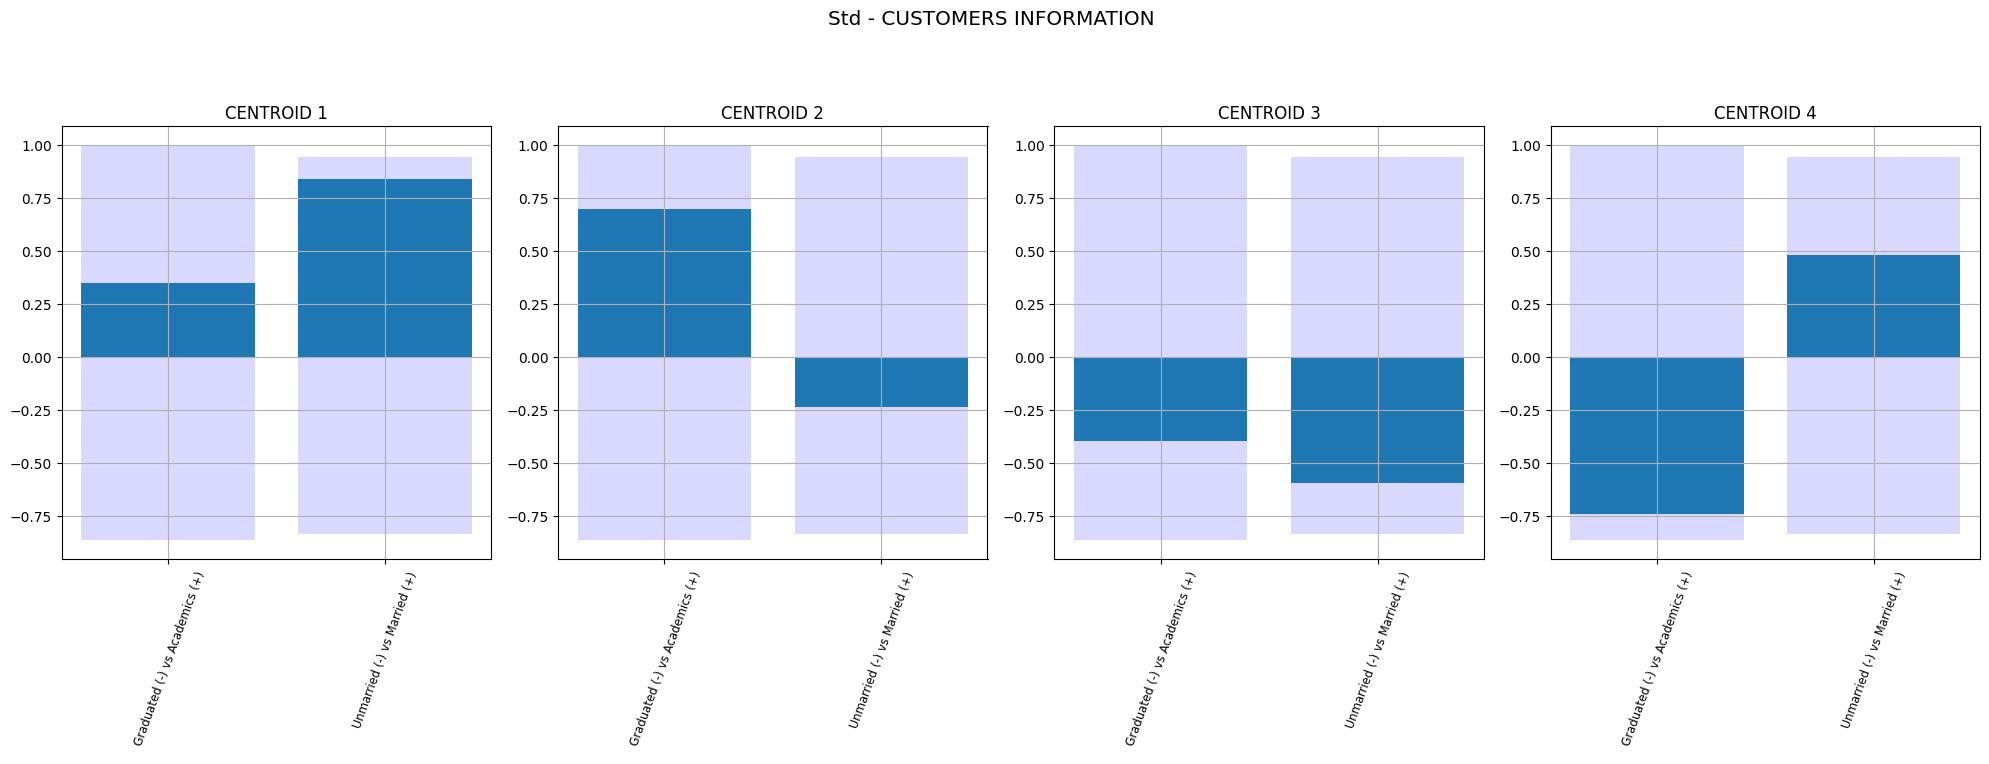

In [332]:
#Mm
# Max/Min value in the PCs-space
maxs_y = Ymm.max(axis=0)
mins_y = Ymm.min(axis=0)

# Barplot of the centroids
fig_centroids, ax_centroids = plt.subplots(1, 4, figsize=(20, 8))
fig_centroids.suptitle('Std - CUSTOMERS INFORMATION \n', fontsize='x-large')
for ii in range(k_mm):
    ax = ax_centroids[ii]
    ax.bar(np.arange(km_mm.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax.bar(np.arange(km_mm.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax.bar(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[ii, :])
    ax.set_xticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
    ax.set_xticklabels(labels=pc_names_mm, rotation=70)
    ax.tick_params(axis='x', which='both', labelsize='small')
    ax.grid(visible=True, which='both')
    ax.set_title(f'CENTROID {ii+1}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Looking to the different views of the score graphs and to the barplots we observe that:


*   each centroid demonstrates different characteristics in relation to the behaviors, education and purchasing methods of the customers;
*   we can detect every combination of behaviors-education-purchasing methods for each cluster;

Let's give them a name for both the dataframes.

In [333]:
#Give to each centroid a name or a meaningful brief description that characterizes
#the average customer in the cluster represented by the centroid.

cluster_names_std = ['1 - Unmarried Graduated Web Purchasers',
                     '2 - Graduated Family In-store Purchasers',
                     '3 - Researchers Family In-store Purchasers',
                     '4 - Researchers Unmarried Web Purchasers',
                     '5 - Graduated Family Web Purchasers',
                     '6 - Researchers Unmarried In-store Purchasers'
                 ]

In [334]:
#Centroids Names for mm
cluster_names_mm = ['1 - Married Academics',
                    '2 - Unmarried Academics',
                    '3 - Graduated Unmarried',
                    '4 - Graduated Married']

**7** Clusters and Centroids Evaluation

Let's perform an Internal evaluation of the clusterings  using silhouette score for both the dataframes.

In [335]:
#Std
#Silhouette score
silscores = silhouette_samples(YStd, km_std.labels_)
cluster_silscores = [np.mean(silscores[km_std.labels_ == kk]) for kk in range(k_std)]
display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list_std)]), index = cluster_names_std + ['Global'], columns=['Sil. Score']))

,Sil. Score
1 - Unmarried Graduated Web Purchasers,0.410807
2 - Graduated Family In-store Purchasers,0.345884
3 - Researchers Family In-store Purchasers,0.315446
4 - Researchers Unmarried Web Purchasers,0.330620
5 - Graduated Family Web Purchasers,0.410875
6 - Researchers Unmarried In-store Purchasers,0.291332
Global,0.356917


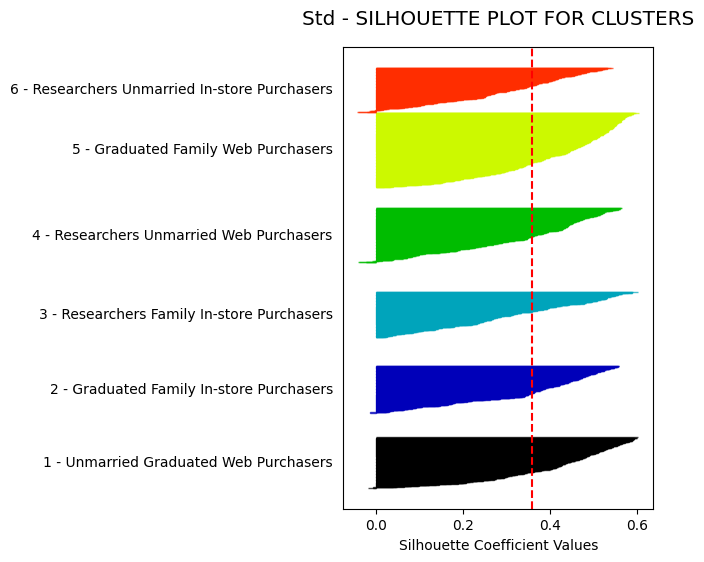

In [336]:
max_points_in_cluster = max([len(silscores[km_std.labels_ == i]) for i in range(k_std)])
subplot_height = max_points_in_cluster + 2
#Plot for clusters
fig, ax = plt.subplots(figsize=(4, 6))
for i in range(k_std):
    sil_vals = silscores[km_std.labels_ == i]
    sil_vals.sort()
    color = cm.nipy_spectral(float(i) / k_std)
    subplot_start_index = i * subplot_height + 1
    ax.barh(np.arange(subplot_start_index, subplot_start_index + len(sil_vals)), sil_vals, color=color, edgecolor=color, alpha=0.7)
    ax.text(-0.1, np.mean(np.arange(subplot_start_index, subplot_start_index + len(sil_vals))), cluster_names_std[i], verticalalignment='center', horizontalalignment='right')
ax.axvline(x=np.mean(silscores), color="red", linestyle="--")
ax.yaxis.set_visible([])
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_title("Std - SILHOUETTE PLOT FOR CLUSTERS", fontsize='x-large', va='center', pad=20)
ax_horizontal = ax.inset_axes([0, 1, 1, 0.01], frame_on=False)
ax_horizontal.get_xaxis().set_visible(False)
ax_horizontal.get_yaxis().set_visible(False)
plt.show()


In [337]:
#Mm
#Silhouette score
silscores = silhouette_samples(Ymm, km_mm.labels_)
cluster_silscores = [np.mean(silscores[km_mm.labels_ == kk]) for kk in range(k_mm)]
display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list_mm)]), index = cluster_names_mm + ['Global'], columns=['Sil. Score']))

,Sil. Score
1 - Married Academics,0.820298
2 - Unmarried Academics,0.674933
3 - Graduated Unmarried,0.770530
4 - Graduated Married,0.962519
Global,0.790528


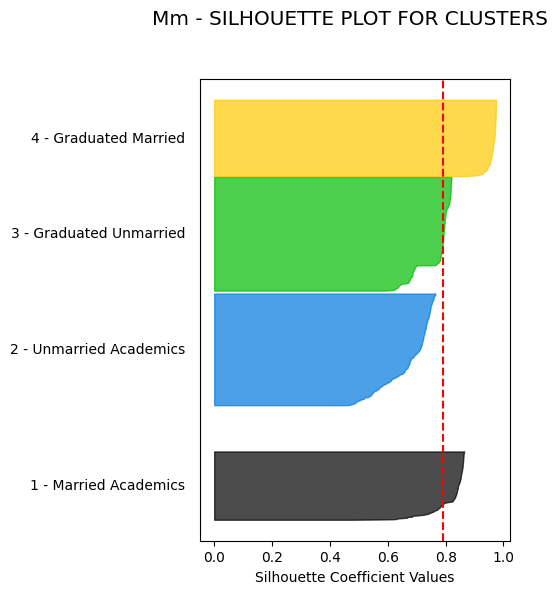

In [338]:
# Plot for clusters
fig, ax = plt.subplots(figsize=(4, 6))
fig.suptitle('Mm - SILHOUETTE PLOT FOR CLUSTERS', fontsize='x-large', va='center')
max_points_in_cluster = max([len(silscores[km_mm.labels_ == i]) for i in range(k_mm)])
subplot_height = max_points_in_cluster + 2
for i in range(k_mm):
    sil_vals = silscores[km_mm.labels_ == i]
    sil_vals.sort()
    color = cm.nipy_spectral(float(i) / k_mm)
    subplot_start_index = i * subplot_height + 1
    ax.fill_betweenx(np.arange(len(sil_vals)) + subplot_start_index, 0, sil_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.1, np.mean(np.arange(len(sil_vals)) + subplot_start_index), cluster_names_mm[i], verticalalignment='center', horizontalalignment='right')
ax.axvline(x=np.mean(silscores), color="red", linestyle="--")
ax.yaxis.set_visible(False)
ax.set_xlabel("Silhouette Coefficient Values")
ax_vertical = ax.inset_axes([0, 0, 0.01, 1], frame_on=False)
ax_vertical.get_xaxis().set_visible(False)
ax_vertical.get_yaxis().set_visible(False)
plt.show()

We observe that:
>for _Xworkdf_std_ the scores for each cluster are close but they aren't great; this can also be seen in the plot where we see many values ​​moving away from the global average, in some cases falling below 0;

>for _Xworkdf_mm_ the scores for each cluster are very good; the plot is better than the previous case as in each cluster the values ​​are distributed more homogeneously without many out-range elements.

We perform an External Evaluation for both dataframes with some barplots where we analyze the meaningful labels we talked about in the point 4. We also consider the five "AcceptedCmp" labels.

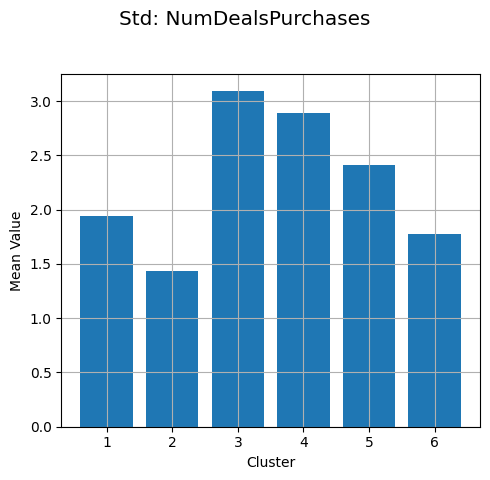

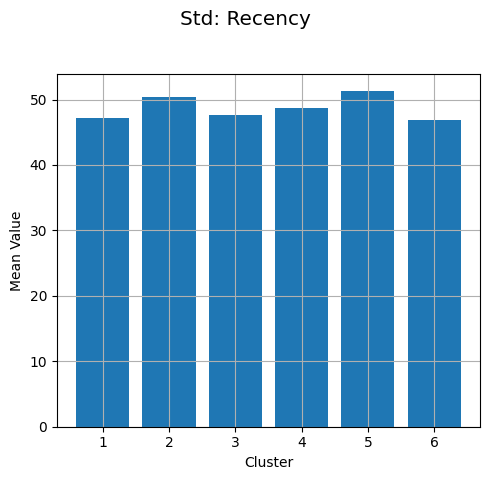

In [339]:
#Std: barplots for the centroids, NumDealsPurchases and Recency
for label in meaningful_labels:
    cluster_means = [workdf.loc[km_std.labels_ == ii, label].mean() for ii in range(k_std)]
    fig_centroids_ext, ax_centroids_ext = plt.subplots(figsize=(5,5))
    fig_centroids_ext.suptitle(f'Std: {label}', fontsize='x-large')
    ax_centroids_ext.bar(range(1, k_std + 1), cluster_means)
    ax_centroids_ext.set_xticks(range(1, k_std + 1))
    ax_centroids_ext.set_xlabel('Cluster')
    ax_centroids_ext.set_ylabel('Mean Value')
    ax_centroids_ext.grid(visible=True, which='both')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

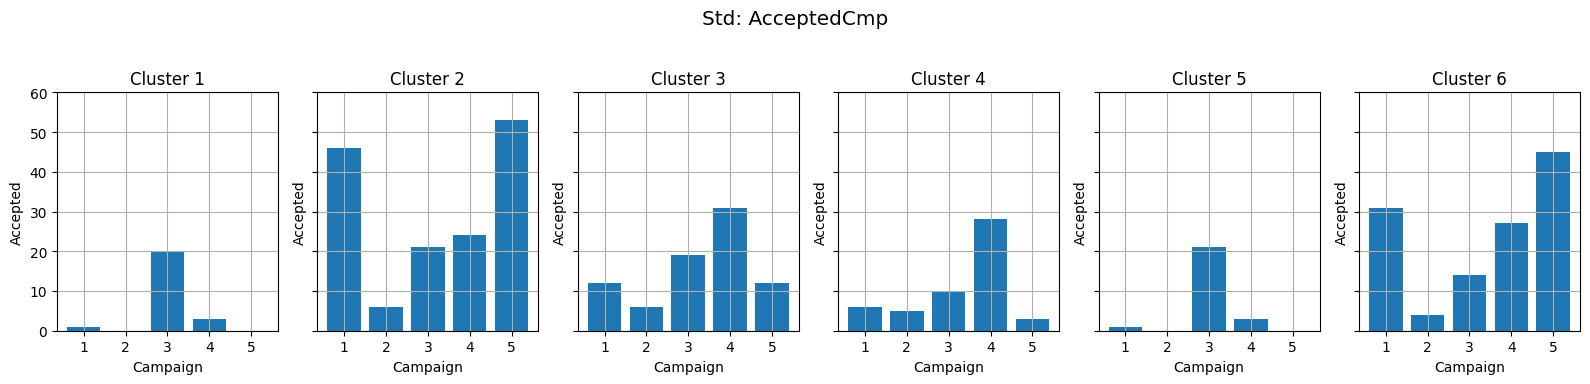

In [340]:
selected_columns = labels_columns[1:6]
max_value = min(60, workdf[selected_columns].apply(lambda x: x.eq(1).sum(), axis=0).max())

#Std: barplots for the centroids, AcceptedCmp
fig_clusters, axes_clusters = plt.subplots(1, k_std, figsize=(16, 4), sharey=True)
fig_clusters.suptitle('Std: AcceptedCmp', fontsize='x-large')
for i in range(k_std):
    cluster_data = workdf.loc[km_std.labels_ == i, selected_columns]
    cluster_sum_ones = cluster_data.apply(lambda x: x.eq(1).sum(), axis=0)
    ax = axes_clusters[i]
    ax.bar(range(1, 6), cluster_sum_ones)
    ax.set_xticks(range(1, 6))
    ax.set_xlabel('Campaign')
    ax.set_ylabel('Accepted')
    ax.grid(visible=True, which='both')
    ax.set_title(f'Cluster {i+1}')
    ax.set_ylim(0, max_value)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

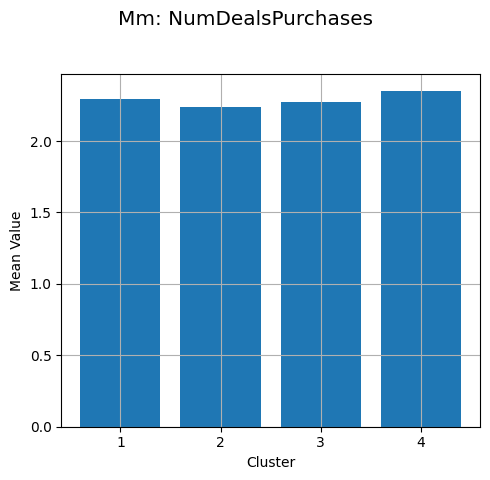

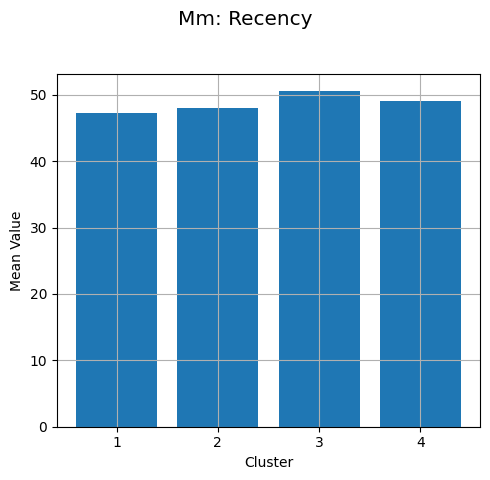

In [341]:
#Mm: barplots for the centroids, NumDealsPurchases and Recency
for label in meaningful_labels:
    cluster_means = [workdf.loc[km_mm.labels_ == ii, label].mean() for ii in range(k_mm)]
    fig_centroids_ext, ax_centroids_ext = plt.subplots(figsize=(5, 5))
    fig_centroids_ext.suptitle(f'Mm: {label}', fontsize='x-large')
    ax_centroids_ext.bar(range(1, k_mm + 1), cluster_means)
    ax_centroids_ext.set_xticks(range(1, k_mm + 1))
    ax_centroids_ext.set_xlabel('Cluster')
    ax_centroids_ext.set_ylabel('Mean Value')
    ax_centroids_ext.grid(visible=True, which='both')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

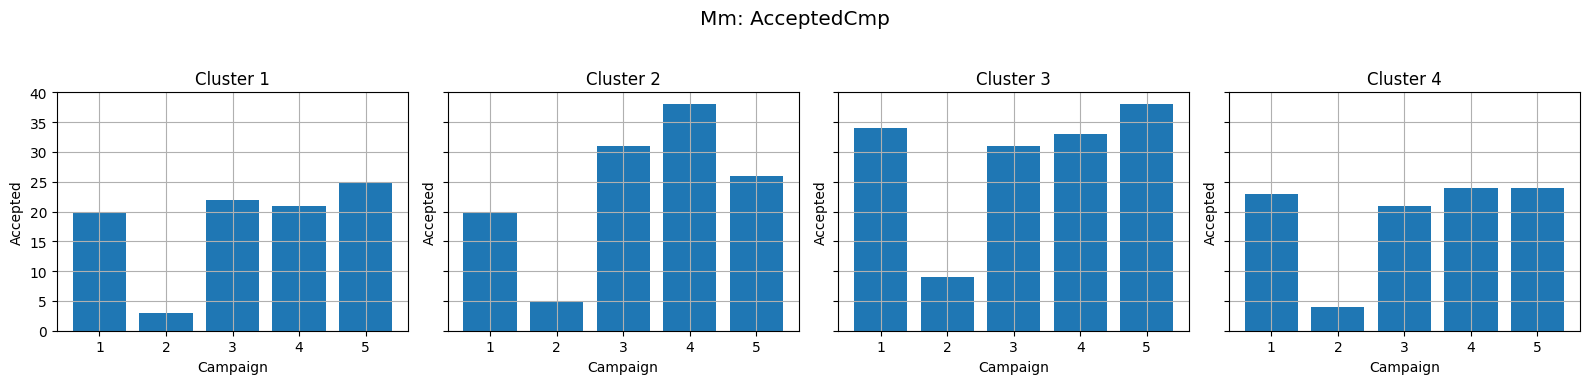

In [342]:
max_value = min(40, workdf[selected_columns].apply(lambda x: x.eq(1).sum(), axis=0).max())

#Mm: barplots for the centroids, AcceptedCmp
fig_clusters, axes_clusters = plt.subplots(1, k_mm, figsize=(16, 4), sharey=True)
fig_clusters.suptitle('Mm: AcceptedCmp', fontsize='x-large')
for i in range(k_mm):
    cluster_data = workdf.loc[km_mm.labels_ == i, selected_columns]
    cluster_sum_ones = cluster_data.apply(lambda x: x.eq(1).sum(), axis=0)
    ax = axes_clusters[i]
    ax.bar(range(1, 6), cluster_sum_ones)
    ax.set_xticks(range(1, 6))
    ax.set_xlabel('Campaign')
    ax.set_ylabel('Accepted')
    ax.grid(visible=True, which='both')
    ax.set_title(f'Cluster {i+1}')
    ax.set_ylim(0, max_value)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We report some relevant observations:
> For labels 'NumDealsPurchases' and 'Recency' the average values ​​of each cluster are distributed more sparsely in _Xworkdf_std_ than in _Xworkdf_mm_, furthermore the cluster 3(Researchers-Family-In-store Purchasers) is the one that took advantage of the discounts the most.

>For the "AcceptedCmp" labels, we observe in the barplots some similarities between:
*   Clusters 1 and 5 (both characterized by graduated online-shoppers customers) for _Xworkdf_std_;
*   Cluster 2 and 6 (both are In-store purchasers) but with lower interess for the 1st and 5th campaign for the Cluster 6.
*   Clusters 1 and 4 (both with married customers) for _Xworkdf_mm_.
*   Clusters 2 and 3 (both with unmarried customers) but with higher acceptances for the 1st and 5th campaign for the Cluster 3.